# Introduction:

This is an exploratory data analysis project in Python that looks into data scientists’ jobs and the companies that wish to
hire them. This dataset was made by scraping the job postings related to the position of 'Data Scientist' from 
www.glassdoor.com in the USA. The field of data science and data analytics has become very attractive. In recent years, 
lots of businesses and employees saw the field of data analytics as a practice for both self & business developments. 
Thus, this dataset is a great opportunity to examine the demand side of data scientists from the company’s perspective and 
understand what has become from the trend.



Predicting the Average Salary of the USA-based data scientist, based on their skills and different features like location, 
education, etc. We will use a supervised machine learning algorithm to predict the salary.


# Dataset:
The dataset is scraped from the Glassdoor website using Selenium scrapper. After scrapping, the raw dataset was cleaned and
made usable for performing data analysis and modeling. The dataset contains information about the minimum salary, 
maximum salary, average salary, job description, age of the company in years, etc.


Note: -1 value in any column means either the information was not available or selenium was not able to scrap it. 
You can remove or replace the -1 value however you like.

So, we  replaced -1 values with mean, median, and mode.

The shape of the dataset is (742,42) i.e. it has 742 observations and 42 features, during pre-processing, 
we removed 12 features because it was not required for salary predictions. Then we did a univariate selection to select the 
important feature for model building, then we were left with the 20 most important features


## loading libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset

In [2]:
df = pd.read_csv(r"D:\data\data_cleaned_2021.csv")

In [3]:
df.head()

index                  Job Title              Salary Estimate  \
0      0             Data Scientist   $53K-$91K (Glassdoor est.)   
1      1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2      2             Data Scientist   $80K-$90K (Glassdoor est.)   
3      3             Data Scientist   $56K-$97K (Glassdoor est.)   
4      4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters          Size  Founded  ... tensor hadoop tableau bi flink  \
0      Goleta, CA   501 - 1000      1973  ...      0      0       1  1     0   
1   Baltimore, MD       10000+      1984  ...      0      0       0  0     0   
2  Clearwater, FL   501 - 1000      2010  ...      0      0       0  0     0   
3    Richland, WA  1001 - 5000      1965  ...      0      0       0  0     0   
4    New York, NY     51 - 200      1998  ...      0      0       0  0     0   

   mongo  google_an   job_title_sim  seniority_by_title  Degree  
0      0          0  data scientist                  na       M  
1      0          0  data scientist                  na       M  
2      0          0  data scientist                  na       M  
3      0          0  data scientist                  na      na  
4      0          0  data scientist                  na      na  

[5 rows x 42 columns]

In [4]:
pd.set_option('display.max_columns', None) # To see all the features
df.head()

index                  Job Title              Salary Estimate  \
0      0             Data Scientist   $53K-$91K (Glassdoor est.)   
1      1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2      2             Data Scientist   $80K-$90K (Glassdoor est.)   
3      3             Data Scientist   $56K-$97K (Glassdoor est.)   
4      4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters          Size  Founded   Type of ownership  \
0      Goleta, CA   501 - 1000      1973   Company - Private   
1   Baltimore, MD       10000+      1984  Other Organization   
2  Clearwater, FL   501 - 1000      2010   Company - Private   
3    Richland, WA  1001 - 5000      1965          Government   
4    New York, NY     51 - 200      1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors  Hourly  \
0                                                 -1       0   
1                                                 -1       0   
2                                                 -1       0   
3  Oak Ridge National Laboratory, National Renewa...       0   
4               Commerce Signals, Cardlytics, Yodlee       0   

   Employer provided  Lower Salary  Upper Salary  Avg Salary(K)  \
0                  0            53            91           72.0   
1                  0            63           112           87.5   
2                  0            80            90           85.0   
3                  0            56            97           76.5   
4                  0            86           143          114.5   

                             company_txt Job Location  Age  Python  spark  \
0                      Tecolote Research           NM   48       1      0   
1  University of Maryland Medical System           MD   37       1      0   
2                                KnowBe4           FL   11       1      1   
3                                   PNNL           WA   56       1      0   
4                     Affinity Solutions           NY   23       1      0   

   aws  excel  sql  sas  keras  pytorch  scikit  tensor  hadoop  tableau  bi  \
0    0      1    0    1      0        0       0       0       0        1   1   
1    0      0    0    0      0        0       0       0       0        0   0   
2    0      1    1    1      0        0       0       0       0        0   0   
3    0      0    0    0      0        0       0       0       0        0   0   
4    0      1    1    1      0        0       0       0       0        0   0   

   flink  mongo  google_an   job_title_sim se

In [5]:
df.columns #To see all the column names

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

# EDA & Data Preprocessing

In [6]:
# Checking the shape of our data frame i.e. no. of rows and columns

df.shape

(742, 42)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

In [8]:
df.describe()

index      Rating      Founded      Hourly  Employer provided  \
count  742.000000  742.000000   742.000000  742.000000         742.000000   
mean   469.129380    3.618868  1837.154987    0.032345           0.022911   
std    279.793117    0.801210   497.183763    0.177034           0.149721   
min      0.000000   -1.000000    -1.000000    0.000000           0.000000   
25%    221.500000    3.300000  1939.000000    0.000000           0.000000   
50%    472.500000    3.700000  1988.000000    0.000000           0.000000   
75%    707.750000    4.000000  2007.000000    0.000000           0.000000   
max    955.000000    5.000000  2019.000000    1.000000           1.000000   

       Lower Salary  Upper Salary  Avg Salary(K)         Age      Python  \
count    742.000000    742.000000     742.000000  742.000000  742.000000   
mean      74.754717    128.214286     101.484501   47.524259    0.528302   
std       30.945892     45.128650      37.482449   53.839080    0.499535   
min       15.000000     16.000000      15.500000   -1.000000    0.000000   
25%       52.000000     96.000000      73.500000   12.000000    0.000000   
50%       69.500000    124.000000      97.500000   25.000000    1.000000   
75%       91.000000    155.000000     122.500000   60.000000    1.000000   
max      202.000000    306.000000     254.000000  277.000000    1.000000   

            spark         aws       excel         sql         sas       keras  \
count  742.000000  742.000000  742.000000  742.000000  742.000000  742.000000   
mean     0.225067    0.237197    0.522911    0.512129    0.088949    0.039084   
std      0.417908    0.425651    0.499812    0.500190    0.284862    0.193925   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    1.000000    0.000000    0.000000   
75%      0.000000    0.000000    1.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          pytorch      scikit      tensor      hadoop     tableau          bi  \
count  742.000000  742.000000  742.000000  742.000000  742.000000  742.000000   
mean     0.052561    0.072776    0.097035    0.167116    0.199461    0.075472   
std      0.223305    0.259944    0.296205    0.373331    0.399865    0.264329   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            flink       mongo   google_an  
count  742.000000  742.000000  742.000000  
mean     0.013477    0.049865    0.018868  
std      0.115384    0.217813    0.136150  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000

In [9]:
#here we have replaced -1 with nan

df.replace("-1", np.nan, inplace=True)
df.replace(-1, np.nan, inplace=True)

#df.replace('na', np.nan, inplace=True)

# finding null values



In [10]:
df.isnull().sum()

index                   0
Job Title               0
Salary Estimate         0
Job Description         0
Rating                 11
Company Name            0
Location                0
Headquarters            1
Size                    0
Founded                50
Type of ownership       0
Industry               10
Sector                 10
Revenue                 0
Competitors           460
Hourly                  0
Employer provided       0
Lower Salary            0
Upper Salary            0
Avg Salary(K)           0
company_txt             0
Job Location            0
Age                    50
Python                  0
spark                   0
aws                     0
excel                   0
sql                     0
sas                     0
keras                   0
pytorch                 0
scikit                  0
tensor                  0
hadoop                  0
tableau                 0
bi                      0
flink                   0
mongo                   0
google_an   

# As our data frame contains missing values name as "-1" So to handle missing values we check missing values column data type i.e. "Object" so we replace it with mode

In [11]:
# first handelling categorical varibles

df["Industry"] = df["Industry"].fillna(df["Industry"].mode()[0]) 

In [12]:
df["Sector"] = df["Sector"].fillna(df["Sector"].mode()[0]) 

C:\Users\pritam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

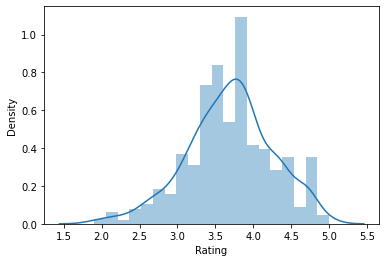

In [13]:
# now we will handle numerical values

sns.distplot(df['Rating'])

In [14]:
# It is following normal distribution so we can replace it with mean

df["Rating"] = df["Rating"].fillna(df["Rating"].mean())

C:\Users\pritam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

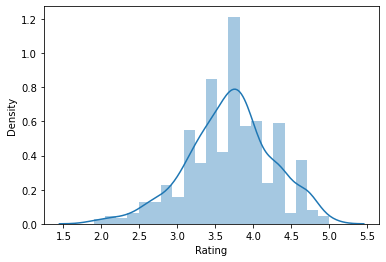

In [15]:
sns.distplot(df['Rating'])

C:\Users\pritam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

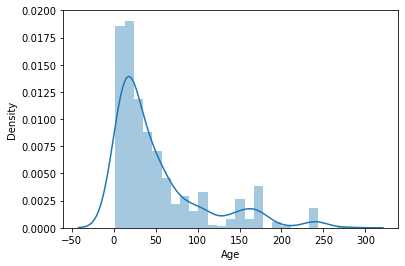

In [16]:
# for Age

sns.distplot(df['Age'])

In [17]:
#Age data is right skewed so we replace null values with median.

df["Age"] = df["Age"].fillna(df["Age"].median())

C:\Users\pritam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

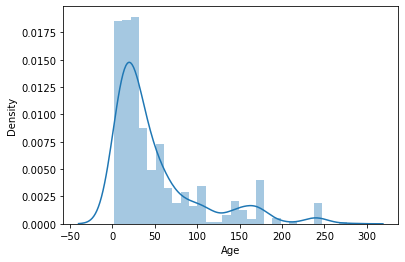

In [18]:
sns.distplot(df['Age'])

In [19]:
# for founded

df["Founded"] = df["Founded"].fillna(df["Founded"].median())

In [20]:
# now there is no missing values

df.isnull().sum()

index                   0
Job Title               0
Salary Estimate         0
Job Description         0
Rating                  0
Company Name            0
Location                0
Headquarters            1
Size                    0
Founded                 0
Type of ownership       0
Industry                0
Sector                  0
Revenue                 0
Competitors           460
Hourly                  0
Employer provided       0
Lower Salary            0
Upper Salary            0
Avg Salary(K)           0
company_txt             0
Job Location            0
Age                     0
Python                  0
spark                   0
aws                     0
excel                   0
sql                     0
sas                     0
keras                   0
pytorch                 0
scikit                  0
tensor                  0
hadoop                  0
tableau                 0
bi                      0
flink                   0
mongo                   0
google_an   

In [21]:
# we are dropping Competitors variable because it has more than 50% nan values

df.drop("Competitors",axis=1,inplace=True)

# Checking For outliers Using Box-plot

C:\Users\pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

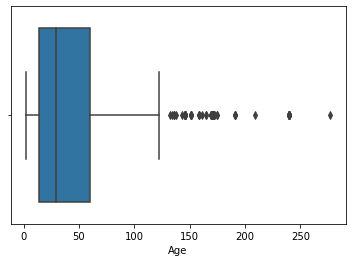

In [22]:
sns.boxplot(df['Age'])

In [23]:
#Removing outliers

Q1 = df['Age'].quantile(0.25)
print(Q1)
Q3 = df['Age'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Age']=np.where(df['Age']>upper_whisker,upper_whisker,np.where(df['Age']<lower_whisker,lower_whisker,df['Age']))

14.0
60.0
46.0


C:\Users\pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(742, 41)

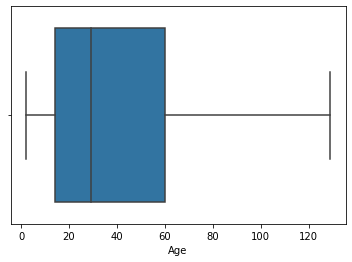

In [24]:
sns.boxplot(df['Age'])
df.shape

C:\Users\pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

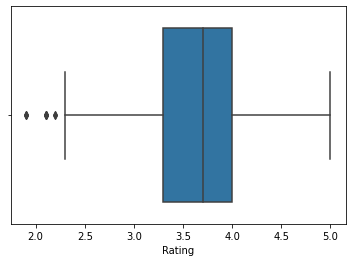

In [25]:
sns.boxplot(df['Rating'])

In [26]:
#Removing outliers

Q1 = df['Rating'].quantile(0.25)
print(Q1)
Q3 = df['Rating'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Rating']=np.where(df['Rating']>upper_whisker,upper_whisker,np.where(df['Rating']<lower_whisker,lower_whisker,df['Rating']))

3.3
4.0
0.7000000000000002


C:\Users\pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

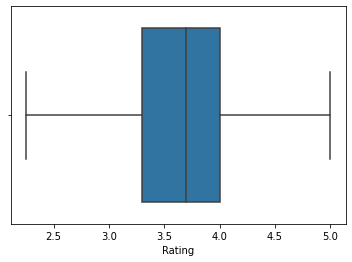

In [27]:
sns.boxplot(df['Rating'])

In [28]:
# this code prints all rows and columns

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

index                                          Job Title  \
0        0                                     Data Scientist   
1        1                          Healthcare Data Scientist   
2        2                                     Data Scientist   
3        3                                     Data Scientist   
4        4                                     Data Scientist   
5        5                                     Data Scientist   
6        6                                     Data Scientist   
7        7                                     Data Scientist   
8        8                                 Research Scientist   
9        9                                     Data Scientist   
10      10                                     Data Scientist   
11      11                                     Data Scientist   
12      12                  Staff Data Scientist - Technology   
13      13                                       Data Analyst   
14      14                                     Data Scientist   
15      15                                    Data Engineer I   
16      16                            Scientist I/II, Biology   
17      17                            Customer Data Scientist   
18      18             Data Scientist - Health Data Analytics   
19      19                                     Data Scientist   
20      20                                     Data Scientist   
21      21           Senior Data Scientist / Machine Learning   
22      22                      Data Scientist - Quantitative   
23      23                                     Data Scientist   
24      25                                     Data Scientist   
25      26                      Digital Health Data Scientist   
26      27                                     Data Scientist   
27      28                             Associate Data Analyst   
28      29                            Clinical Data Scientist   
29      30                                     Data Scientist   
30      31                                     Data Scientist   
31      32                                     Data Scientist   
32      33           Data Scientist / Machine Learning Expert   
33      34                                     Data Scientist   
34      35                                     Data Scientist   
35      36                                   Web Data Analyst   
36      37                                     Data Scientist   
37      38                                     Data Scientist   
38      39                              Senior Data Scientist   
39      40                                      Data Engineer   
40      41                                       Data Analyst   
41      43                                      Data Engineer   
42      44            Data Scientist - Algorithms & Inference   
43      45                                          Scientist   
44      46                              Senior Data Scientist   
45      48                                     Data Scientist   
46      49                                Lead Data Scientist   
47      50                             Associate Data Analyst   
48      51                        Spectral Scientist/Engineer   
49      52  College Hire - Data Scientist - Open to Decemb...   
50      54                                     Data Scientist   
51      55             Data Scientist, Office of Data Science   
52      56                               Data Science Analyst   
53      57                                     Data Scientist   
54      58                                     Data Scientist   
55      59                                     Data Scientist   
56      60                                     Data Scientist   
57      61                                     Data Scientist   
58      62                                     Data Scientist   
59      63                                     Data Scientist   
60      65                              

In [29]:
# checking wheather we have  duplicate rows or not and we have none

if df.duplicated().sum() == 0:
    print("There are no duplicated rows in this dataset")
else: 
    print("There are",df.duplicated().sum(),"in this dataset")

There are no duplicated rows in this dataset


# dropping salary estimate because it is already broken into lower salary and upper salary, job description dosen't seems important variable and index also so we drop it.


In [30]:

df.drop(columns=['Salary Estimate','index','Job Description',], inplace = True)

# It looks like company name includes both the company name and its rank. The company name appears to be in the column 'company_txt' and we already have the rating. I will drop it as well, I will also rename company_txt.

In [31]:
df.drop(columns=['Company Name'], inplace = True)
df.rename(columns={"company_txt": "Company Name"}, inplace = True)

# values in Column 'Location' and 'Job Location' has repeated so we are dropping 'Location' column 

In [32]:
df.drop(columns=['Location'], inplace = True)


# I dropped Headquarter column as I think it not reauired for salary prediction

In [33]:
df.drop("Headquarters",axis=1,inplace=True)

# I dropped Employer Provided column as I think it not required for salary prediction

In [34]:
df.drop("Employer provided",axis=1,inplace=True)

# I also dropped Industry column because sector column also represent the same values as industry

In [35]:
df.drop("Industry",axis=1,inplace=True)

# dropping founded column because it is not required for salary prediction

In [36]:
df.drop("Founded",axis=1,inplace=True)

In [37]:
df['job_title_sim'].value_counts()

data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
na                                 10
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64

In [38]:
len(df['job_title_sim'].unique()) # we have 225 unique job_title_sim

10

In [39]:
df['Job Title'].value_counts()

Data Scientist                                                                       131
Data Engineer                                                                         53
Senior Data Scientist                                                                 34
Data Analyst                                                                          15
Senior Data Engineer                                                                  14
                                                                                    ... 
Big Data Engineer - Chicago - Future Opportunity                                       1
Data Scientist Manager                                                                 1
Director, Data Science                                                                 1
Data Analyst Chemist - Quality System Contractor                                       1
Senior Machine Learning (ML) Engineer / Data Scientist - Cyber Security Analytics      1
Name: Job Title, Leng

In [40]:
len(df['Job Title'].unique()) # we have 225 unique job titles

264

# Job title has 225 unique values and job_title_sim has 10 unique values so we will consider job_title_sim for analysis and drop job title column and also we will rename job_title_sim to Job Title

In [41]:
df.drop(columns=['Job Title'], inplace = True)
df.rename(columns={"job_title_sim": "Job Title"}, inplace = True)

In [42]:
# now we are left with 742 obs. and 31 variables

df.shape

(742, 31)

## Exploratory Data Analysis

## Univariate Analysis

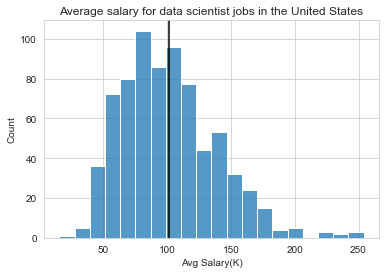

In [43]:
# Average salary for data scientist jobs in the United States
# Average salary = 98.5(k)
sns.set_style("whitegrid")
sns.histplot(data = df, x = 'Avg Salary(K)', bins = 20)
plt.title('Average salary for data scientist jobs in the United States')
plt.axvline(x = df['Avg Salary(K)'].mean(), color = 'black')

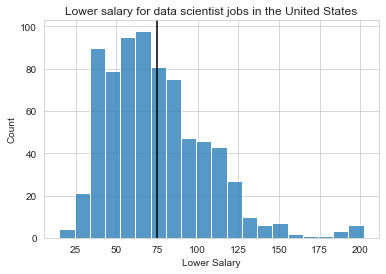

In [44]:
#Lower salary for data scientist jobs in the United States
# Lower salary = 72(k)

sns.set_style("whitegrid")
sns.histplot(data = df, x = 'Lower Salary', bins = 20)
plt.title('Lower salary for data scientist jobs in the United States')
plt.axvline(x = df['Lower Salary'].mean(), color = 'black')

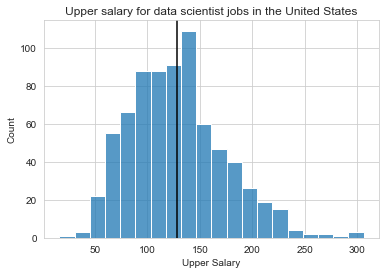

In [45]:
#Upper salary for data scientist jobs in the United States
# Upper salary = 125(k)

sns.set_style("whitegrid")
sns.histplot(data = df, x = 'Upper Salary', bins = 20)
plt.title('Upper salary for data scientist jobs in the United States')
plt.axvline(x = df['Upper Salary'].mean(), color = 'black')

In [46]:
# taking all skills into different dataset

df_skills = df.loc[:, 'Python':'google_an']
Skills = df_skills.columns.tolist()
print(Skills)

['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']


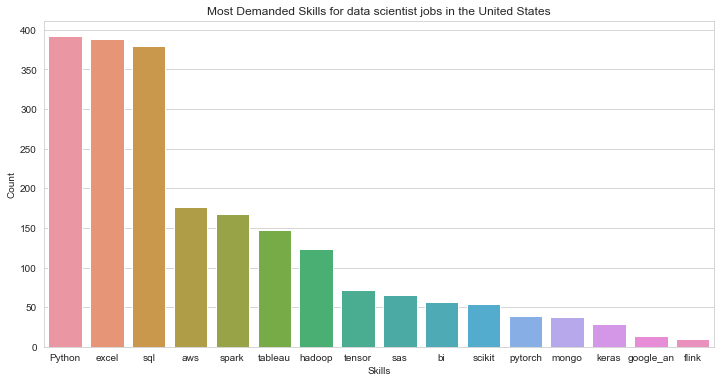

In [47]:
# Most Demanded Skills for data scientist jobs in the United States

plt.figure(figsize=(12, 6))
sns.barplot(x=df_skills.sum().sort_values(ascending=False).index, 
            y=df_skills.sum().sort_values(ascending=False).values)
plt.ylabel('Count')
plt.xlabel('Skills')
plt.title('Most Demanded Skills for data scientist jobs in the United States')
plt.show()

<AxesSubplot:title={'center':'Most Required Profession'}, ylabel='Job Title'>

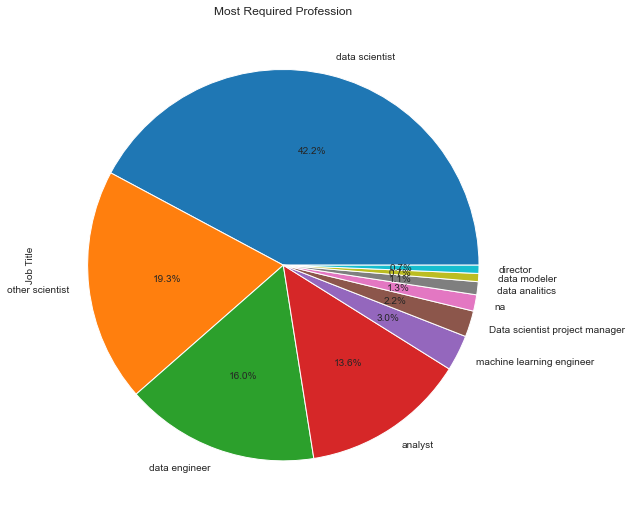

In [48]:
df['Job Title'].value_counts(normalize=True).plot.pie(y = 'Job Title', title = 'Most Required Profession',
                                                              figsize=(12,9), autopct='%1.1f%%')

## Bivariate Analysis

C:\Users\pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

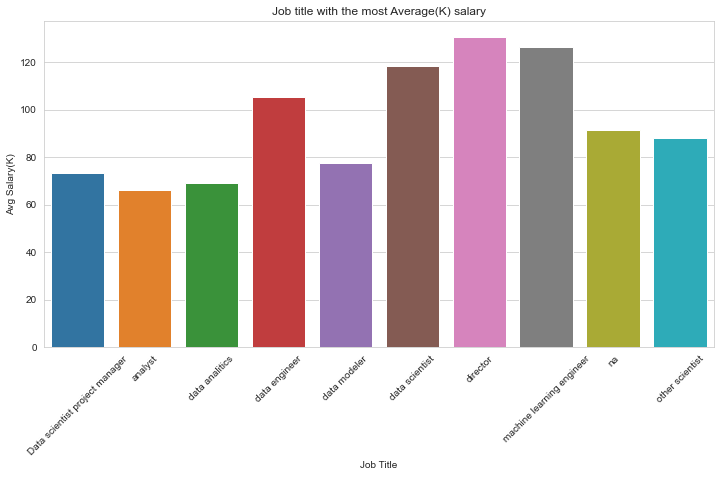

In [49]:
# job title which pay the most

df1=df.groupby('Job Title')['Avg Salary(K)'].mean()
type(df1)



plt.figure(figsize = (12,6))
bx=sns.barplot(df1.index, df1.values)
plt.title('Job title with the most Average(K) salary')
plt.ylabel('Avg Salary(K)')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

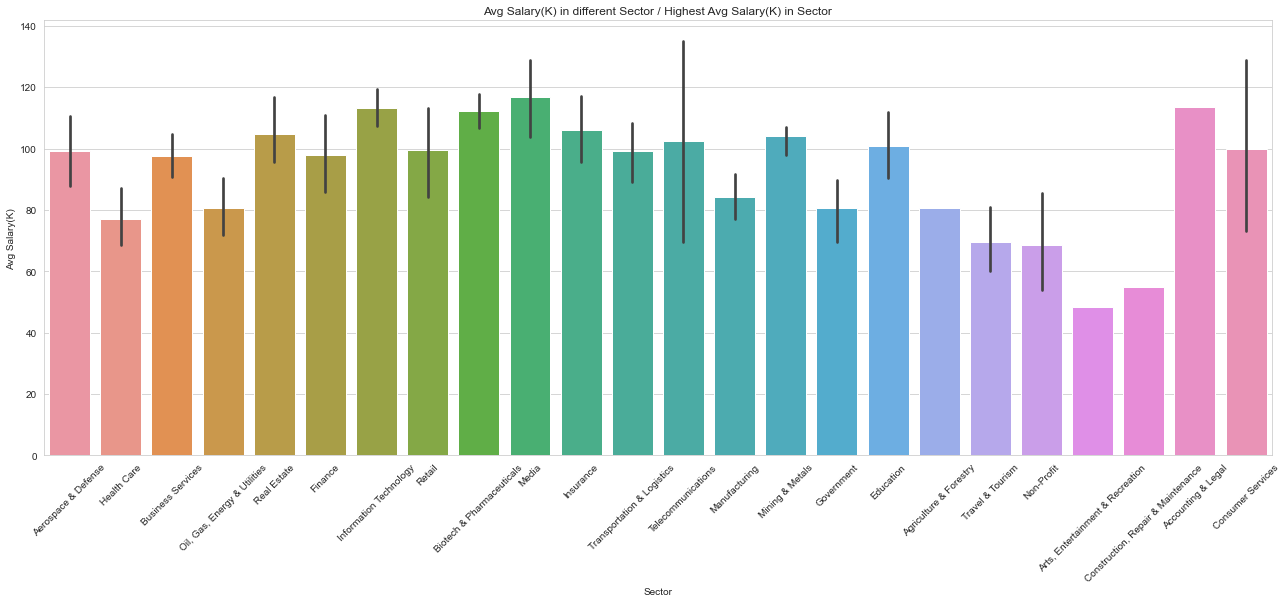

In [50]:
# Avg Salary(K) in different Sector / Highest Avg Salary(K) in Sector


plt.figure(figsize = (22,8))
sns.barplot(x='Sector',y='Avg Salary(K)',data=df)
plt.title('Avg Salary(K) in different Sector / Highest Avg Salary(K) in Sector')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)


Text(0.5, 1.0, 'Avg Salary(K) by Seniority')

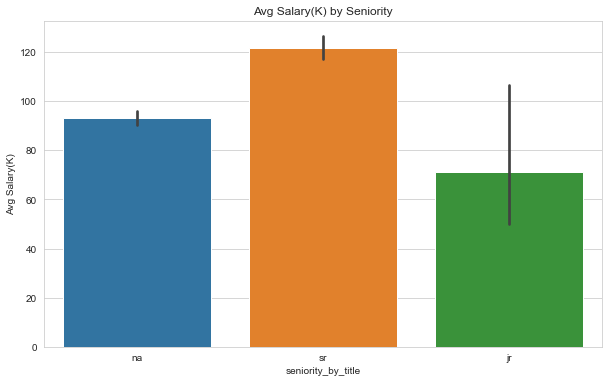

In [51]:
#Average salary by seniority

plt.figure(figsize=(10,6))
sns.barplot(x='seniority_by_title' ,y='Avg Salary(K)',data = df)
plt.title('Avg Salary(K) by Seniority')

In [52]:
# Avg Salary(K) for top 10 Job Location

#result_ = df.groupby('Job Location').mean().sort_values(by = 'Avg Salary(K)', ascending = False)
#plt.barh(result_.index[:10] , result_['Avg Salary(K)'][:10])

Text(0.5, 0, 'Job Location')

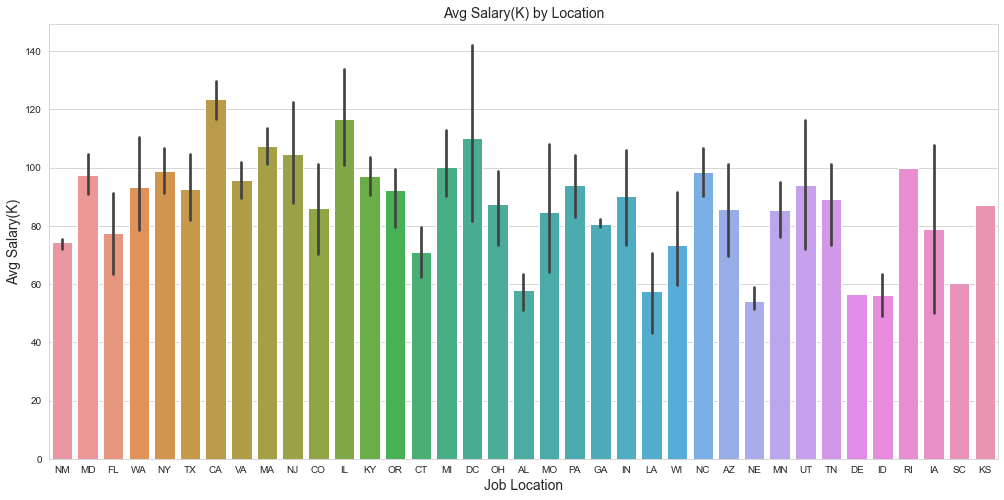

In [53]:
# location which pay the most

plt.figure(figsize=(17,8))
sns.barplot(x='Job Location' , y='Avg Salary(K)',data = df)
plt.title('Avg Salary(K) by Location', fontsize=14)
plt.ylabel('Avg Salary(K)', fontsize = 14 )
plt.xlabel('Job Location', fontsize = 14 )

In [54]:
# No. of Jobs in States

#df1=df.groupby('Job Location')['Job Title'].count()
#type(df1)


#plt.figure(figsize = (15,8))
#bx=sns.barplot(df1.index, df1.values)
#plt.title('No. of Jobs in States',fontsize=14)
#plt.ylabel('No. Of Jobs',fontsize=14)
#plt.xlabel('Job Location', fontsize = 14 )


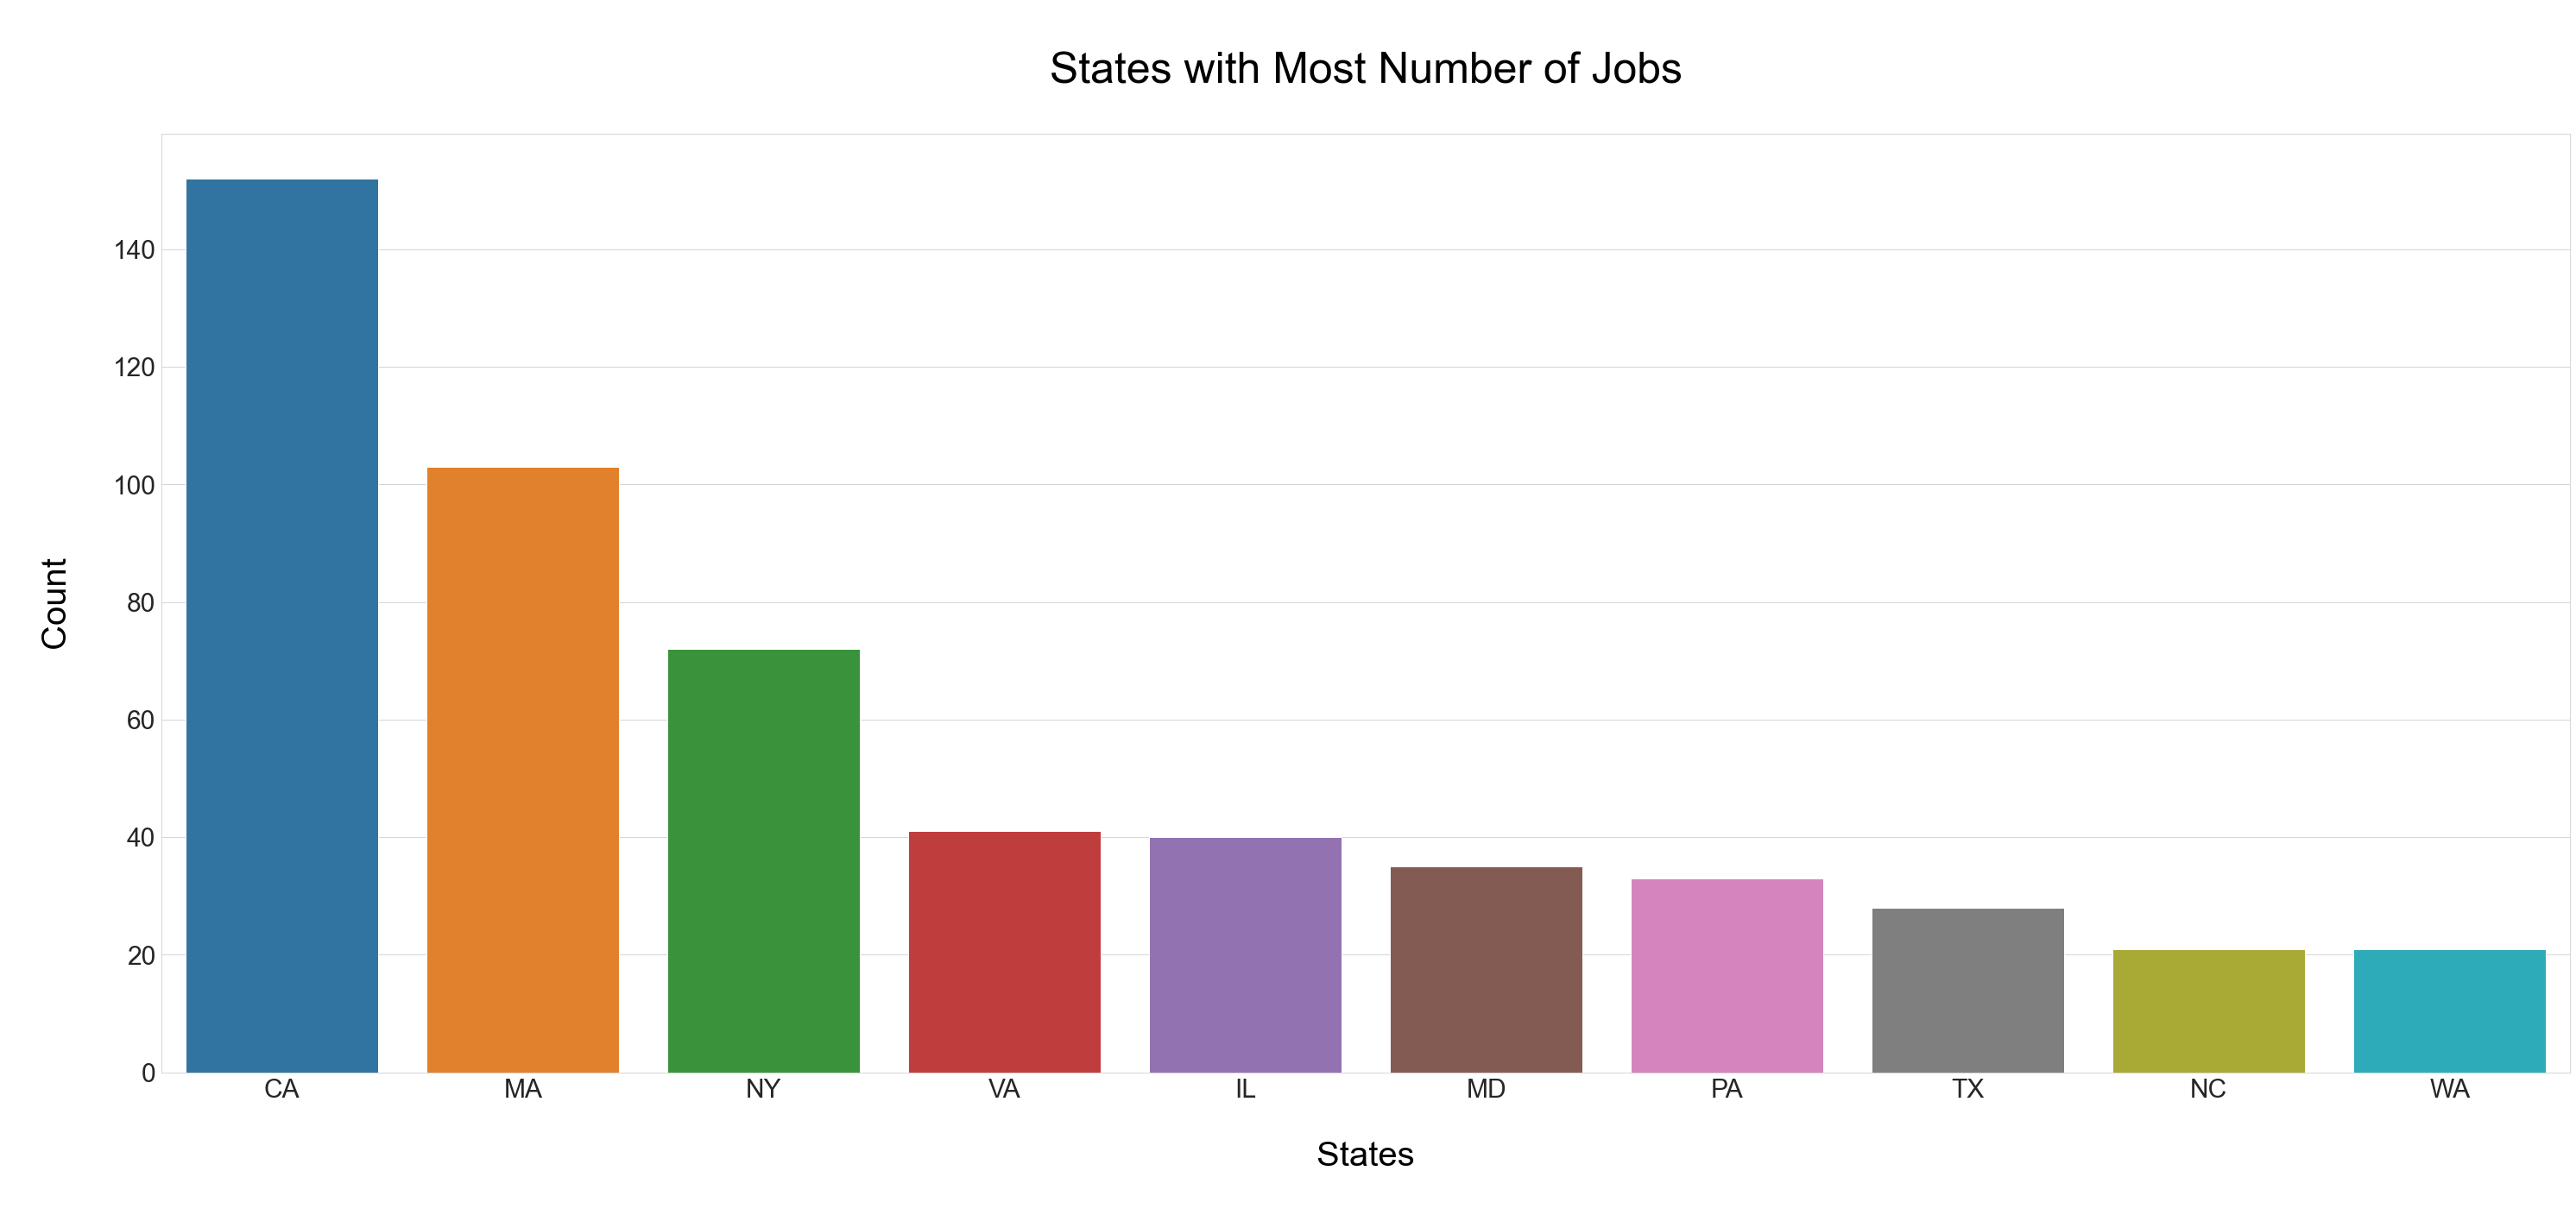

In [55]:
# States with the most number of jobs

plt.figure(figsize=(50,20))
sns.barplot(x=df["Job Location"].value_counts().index[0:10], y = df["Job Location"].value_counts()[0:10],)
plt.title('\n States with Most Number of Jobs \n', size=50, color='black')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('\n States \n', fontsize=40, color='black')
plt.ylabel('\n Count \n', fontsize=40, color='black')
plt.show()

Text(0.5, 1.0, 'Avg Salary(K) by Degree')

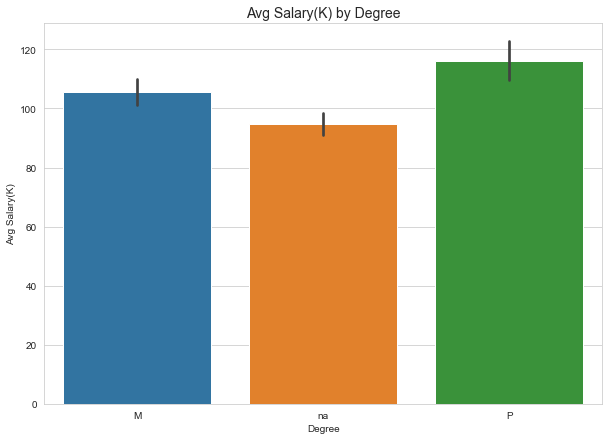

In [56]:
# Degree which pay the most

plt.figure(figsize=(10,7))
sns.barplot(x='Degree' ,y='Avg Salary(K)',data = df)
plt.title('Avg Salary(K) by Degree', fontsize=14)

C:\Users\pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Sector')

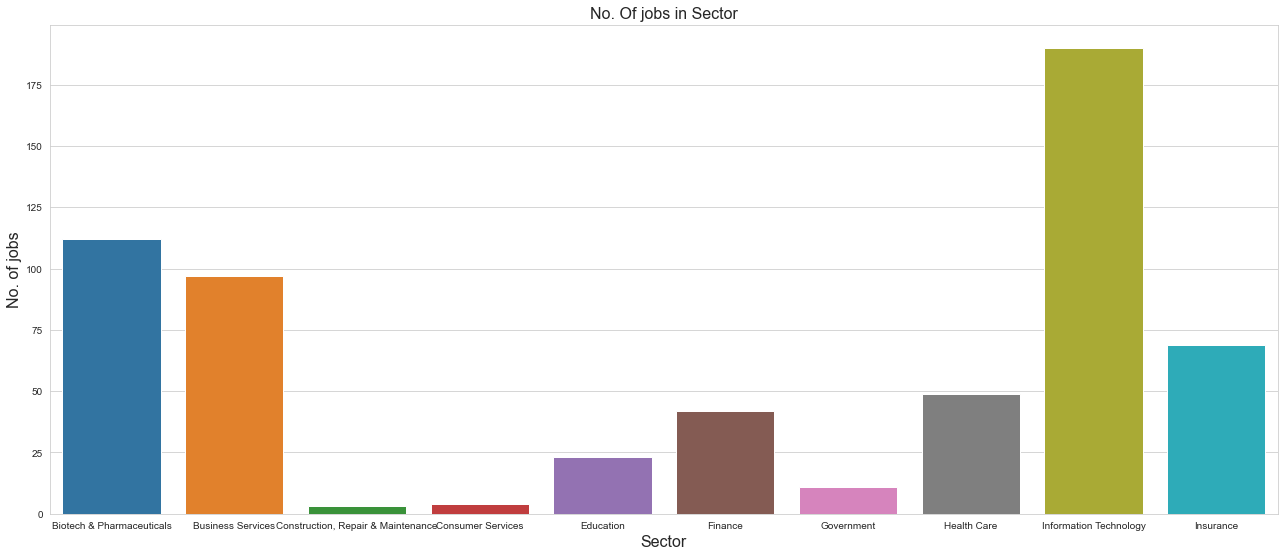

In [57]:
# Jobs by Sector
df1=df.groupby('Sector')['Job Title'].count()
df1=df1[4:14]
type(df1)



plt.figure(figsize = (22,9))
bx=sns.barplot(df1.index, df1.values)
plt.title('No. Of jobs in Sector', fontsize = 16)
plt.ylabel('No. of jobs' , fontsize = 16)
plt.xlabel('Sector', fontsize=16)

Text(0.5, 0, ' Type of ownership')

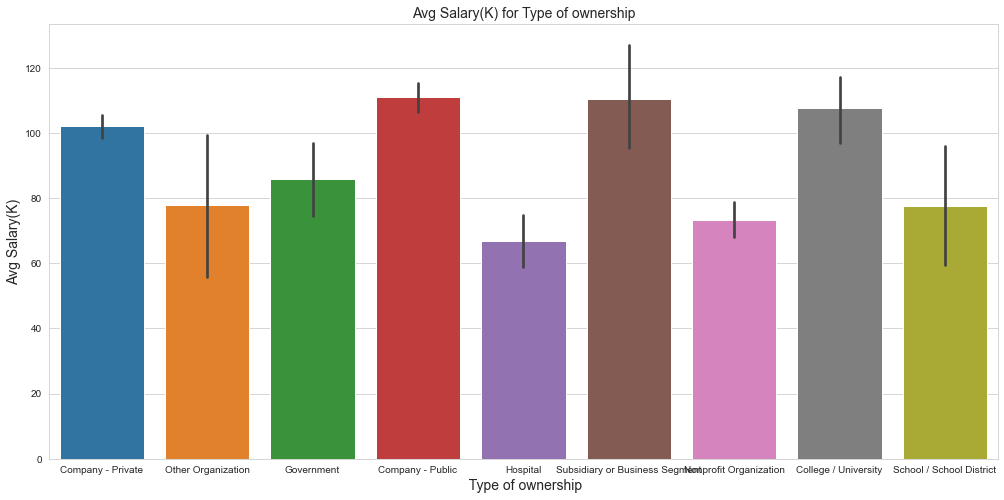

In [58]:
# Avg Salary(K) for Type of ownership


plt.figure(figsize=(17,8))
sns.barplot(x='Type of ownership' ,y='Avg Salary(K)',data = df)
plt.title('Avg Salary(K) for Type of ownership', fontsize=14)
plt.ylabel('Avg Salary(K)', fontsize = 14 )
plt.xlabel(' Type of ownership', fontsize = 14 )

In [59]:
# removed (USD) from Revenue column because there was less space for plotting the graph

df['Revenue'] = df['Revenue'].str.rstrip(' (USD)')

Text(0.5, 0, ' Revenue')

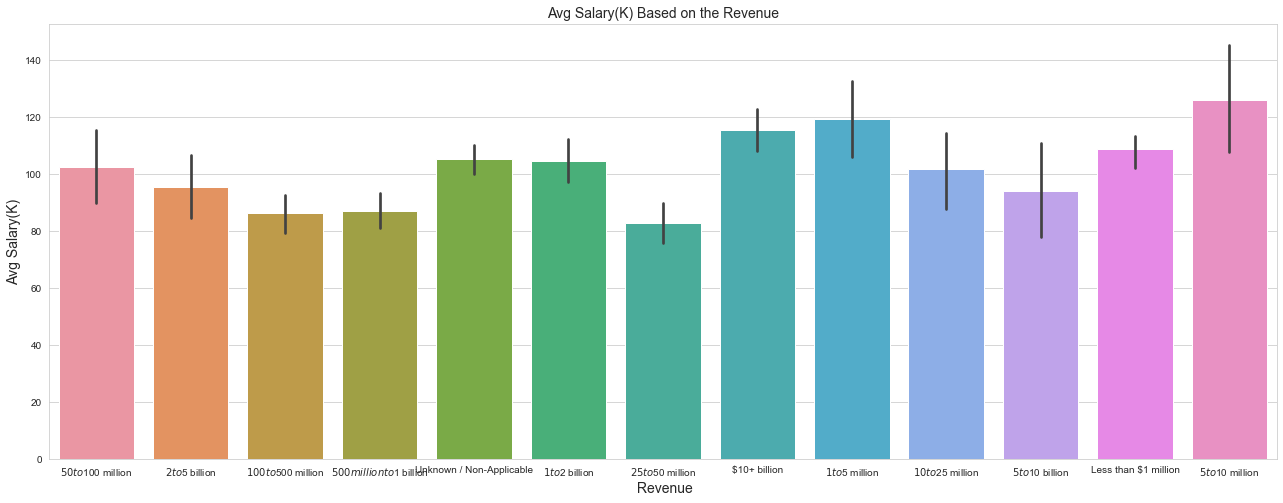

In [60]:
# Avg Salary(K) Based on the Revenue


plt.figure(figsize=(22,8))
sns.barplot(x='Revenue' ,y='Avg Salary(K)',data = df)
plt.title('Avg Salary(K) Based on the Revenue', fontsize=14)
plt.ylabel('Avg Salary(K)', fontsize = 14 )
plt.xlabel(' Revenue', fontsize = 14 )

Text(0.5, 0, ' Rating')

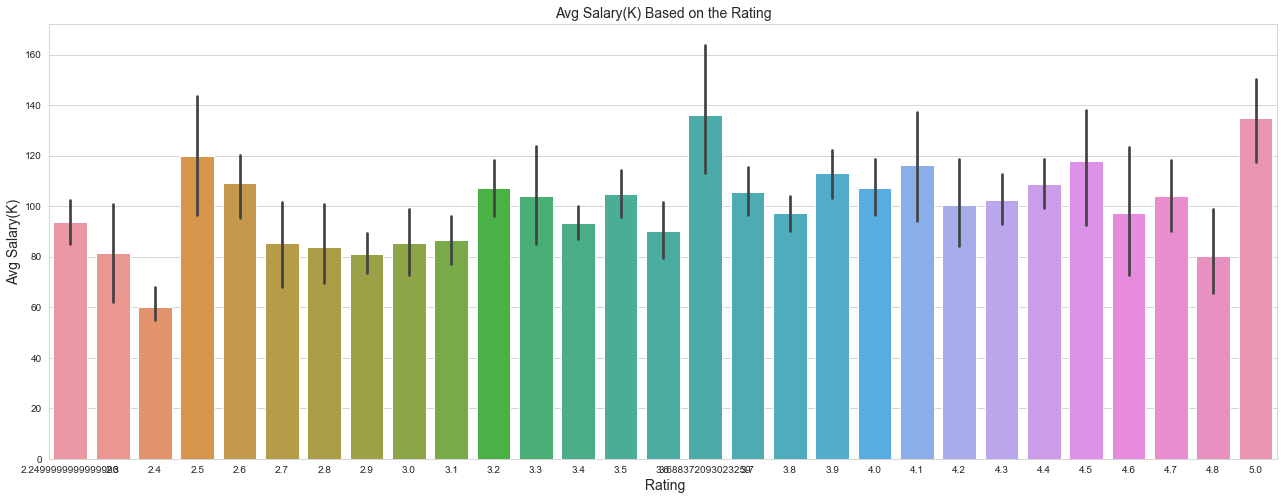

In [61]:
# Avg Salary(K) Based on the Rating

plt.figure(figsize=(22,8))
sns.barplot(x='Rating' ,y='Avg Salary(K)',data = df)
plt.title('Avg Salary(K) Based on the Rating', fontsize=14)
plt.ylabel('Avg Salary(K)', fontsize = 14 )
plt.xlabel(' Rating', fontsize = 14 )

Text(0.5, 0, 'Rating Based on Type of ownership')

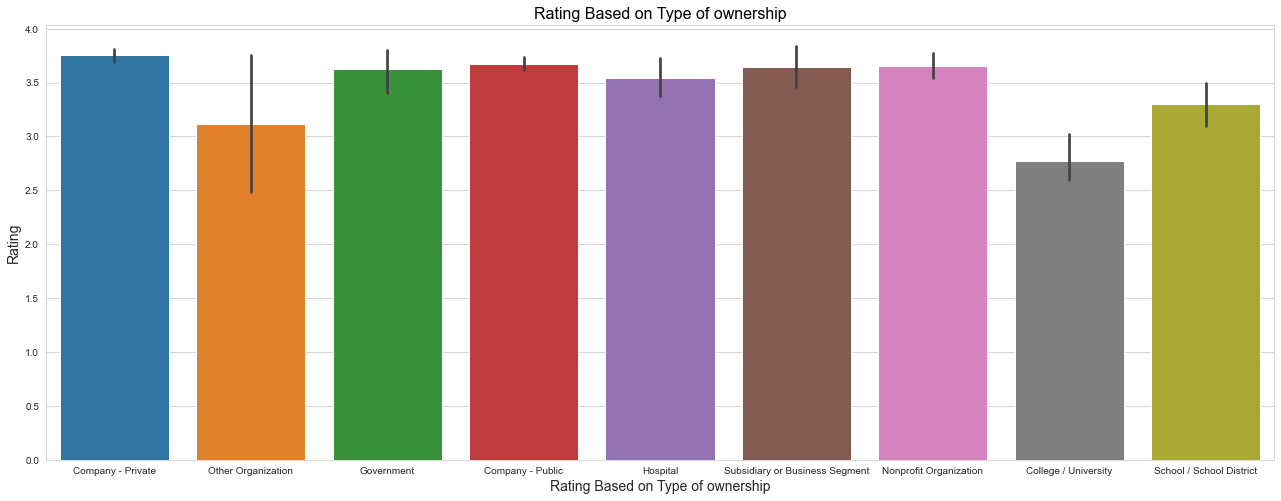

In [62]:
# Rating Based on Type of ownership

plt.figure(figsize=(22,8))
sns.barplot(x='Type of ownership' ,y='Rating',data = df)
plt.title('Rating Based on Type of ownership', fontsize=16, color='black')
plt.ylabel('Rating', fontsize = 14 )
plt.xlabel('Rating Based on Type of ownership', fontsize = 14 )

<AxesSubplot:title={'center':'salary break down by company size'}, xlabel='Size', ylabel='Avg Salary(K)'>

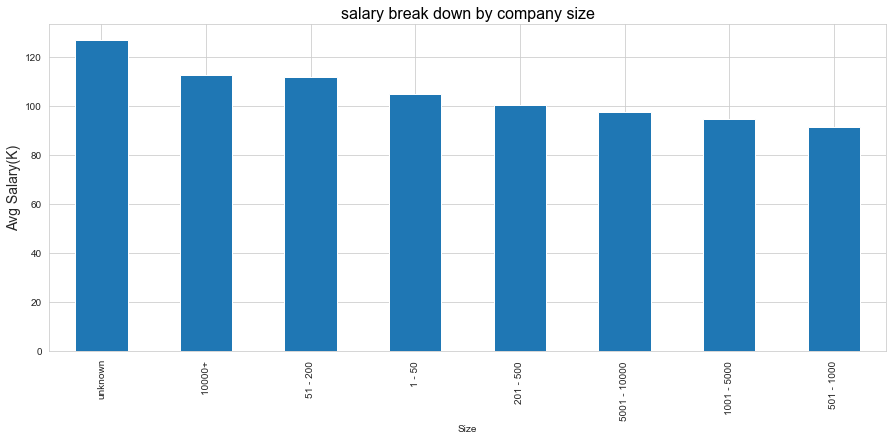

In [63]:
# Salary Break down by company size

df1=df.groupby('Size')['Avg Salary(K)'].mean().sort_values(ascending=False)
plt.figure(figsize = (15,6))
plt.title('salary break down by company size', fontsize =16, color = 'black')
plt.ylabel('Avg Salary(K)', fontsize=14)
df1.plot.bar()

# Label Encoding

In [64]:
from sklearn.preprocessing import LabelEncoder     # instantiate labelencoder object
le = LabelEncoder()

In [65]:
categorical_var = ['Job Location', 'Company Name','Job Title',
                   'Sector','Revenue','Type of ownership','Degree','seniority_by_title','Size']

# Encode Categorical Columns
le = LabelEncoder()
df[categorical_var] = df[categorical_var].apply(le.fit_transform)

In [66]:
le.classes_

array(['1 - 50 ', '10000+ ', '1001 - 5000 ', '201 - 500 ',
       '5001 - 10000 ', '501 - 1000 ', '51 - 200 ', 'unknown'],
      dtype=object)

## Scaling the data using StandardScaler

In [67]:
df.columns

Index(['Rating', 'Size', 'Type of ownership', 'Sector', 'Revenue', 'Hourly',
       'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'Company Name',
       'Job Location', 'Age', 'Python', 'spark', 'aws', 'excel', 'sql', 'sas',
       'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi',
       'flink', 'mongo', 'google_an', 'Job Title', 'seniority_by_title',
       'Degree'],
      dtype='object')

In [68]:
num_cols=['Job Location','Company Name','Job Title','Sector','Revenue','Type of ownership','Degree','Rating','Size',
'Hourly','Lower Salary','Upper Salary','Age','Python','spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
     'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an','seniority_by_title']




In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()
standscale_df = scaler.fit_transform(df[num_cols])
standscale_df = pd.DataFrame(standscale_df, columns =num_cols)

In [71]:
standscale_df.describe()

Job Location  Company Name     Job Title        Sector       Revenue  \
count  7.420000e+02  7.420000e+02  7.420000e+02  7.420000e+02  7.420000e+02   
mean   1.202991e-16  2.120197e-16 -1.226931e-16 -1.345907e-16 -1.009974e-16   
std    1.000675e+00  1.000675e+00  1.000675e+00  1.000675e+00  1.000675e+00   
min   -1.480926e+00 -1.886669e+00 -1.869267e+00 -2.014582e+00 -1.617765e+00   
25%   -1.036373e+00 -7.824496e-01 -7.166388e-01 -9.994932e-01 -8.969594e-01   
50%   -5.835512e-02  6.937690e-02  5.178026e-02  2.186135e-01 -1.761538e-01   
75%    7.418409e-01  8.160396e-01  5.178026e-02  4.216313e-01  1.265458e+00   
max    1.719858e+00  1.709932e+00  1.588618e+00  2.654827e+00  1.265458e+00   

       Type of ownership        Degree        Rating          Size  \
count       7.420000e+02  7.420000e+02  7.420000e+02  7.420000e+02   
mean       -3.800494e-17  1.265834e-16 -5.570192e-16 -1.464836e-16   
std         1.000675e+00  1.000675e+00  1.000675e+00  1.000675e+00   
min        -1.121346e+00 -1.295633e+00 -2.579619e+00 -1.743218e+00   
25%        -5.636791e-01 -1.295633e+00 -6.998645e-01 -6.603650e-01   
50%        -5.636791e-01  9.067947e-01  1.623260e-02 -1.189387e-01   
75%        -6.012577e-03  9.067947e-01  5.533054e-01  9.639139e-01   
max         3.339987e+00  9.067947e-01  2.343548e+00  2.046767e+00   

             Hourly  Lower Salary  Upper Salary           Age        Python  \
count  7.420000e+02  7.420000e+02  7.420000e+02  7.420000e+02  7.420000e+02   
mean  -4.855355e-17 -6.837897e-17 -1.851245e-16 -3.643387e-17  3.778050e-16   
std    1.000675e+00  1.000675e+00  1.000675e+00  1.000675e+00  1.000675e+00   
min   -1.828283e-01 -1.932244e+00 -2.488219e+00 -1.084377e+00 -1.058301e+00   
25%   -1.828283e-01 -7.358025e-01 -7.143138e-01 -7.771481e-01 -1.058301e+00   
50%   -1.828283e-01 -1.699179e-01 -9.344681e-02 -3.931114e-01  9.449112e-01   
75%   -1.828283e-01  5.253118e-01  5.939416e-01  4.005644e-01  9.449112e-01   
max    5.469613e+00  4.114637e+00  3.942188e+00  2.167133e+00  9.449112e-01   

              spark           aws         excel           sql           sas  \
count  7.420000e+02  7.420000e+02  7.420000e+02  7.420000e+02  7.420000e+02   
mean   2.456855e-16  1.642891e-16  1.894262e-16 -5.446377e-17 -8.289266e-17   
std    1.000675e+00  1.000675e+00  1.000675e+00  1.000675e+00  1.000675e+00   
min   -5.389200e-01 -5.576326e-01 -1.046922e+00 -1.024560e+00 -3.124630e-01   
25%   -5.389200e-01 -5.576326e-01 -1.046922e+00 -1.024560e+00 -3.124630e-01   
50%   -5.389200e-01 -5.576326e-01  9.551812e-01  9.760285e-01 -3.124630e-01   
75%   -5.389200e-01 -5.576326e-01  9.551812e-01  9.760285e-01 -3.124630e-01   
max    1.855563e+00  1.793296e+00  9.551812e-01  9.760285e-01  3.200379e+00   

              keras       pytorch        scikit        tensor        hadoop  \
count  7.420000e+02  7.420000e+02  7.420000e+02  7.420000e+02  7.420000e+02   
mean   1.333165e-16 -1.444637e-16 -1.097056e-15 -6.047873e-16 -8.693256e-17   
std    1.000675e+00  1.000675e+00  1.000675e+00  1.000675e+00  1.000675e+00   
min   -2.016760e-01 -2.355346e-01 -2.801578e-01 -3.278150e-01 -4.479367e-01   
25%   -2.016760e-01 -2.355346e-01 -2.801578e-01 -3.278150e-01 -4.479367e-01   
50%   -2.016760e-01 -2.355346e-01 -2.801578e-01 -3.278150e-01 -4.479367e-01   
75%   -2.016760e-01 -2.355346e-01 -2.801578e-01 -3.278150e-01 -4.479367e-01   
max    4.958448e+00  4.245661e+00  3.569417e+00  3.050501e+00  2.232459e+00   

            tableau            bi         flink         mongo     google_an  \
count  7.420000e+02  7.420000e+02  7.420000e+02  7.420000e+02  7.420000e+02   
mean   1.042891e-16 -5.985030e-19 -1.242268e-16 -1.402741e-16  1.795509e-18   
std    1.000675e+00  1.000675e+00  1.000675e+00  1.000675e+00  1.000675e+00   
min   -4.991575e-01 -2.857143e-01 -1.168811e-01 -2.290901e-01 -1.386750e-01   
25%   -4.991575e-01 -2.857143e-01 -1.168811e-01 -2.290901e-01 -1.386750e-01   
50%   -4.991575e-01 -2.857143e-01 -1.168811e-01 -2.290

## Feature selection

## Correlation Matrix with Heatmap

In [72]:
correlation=df.corr()

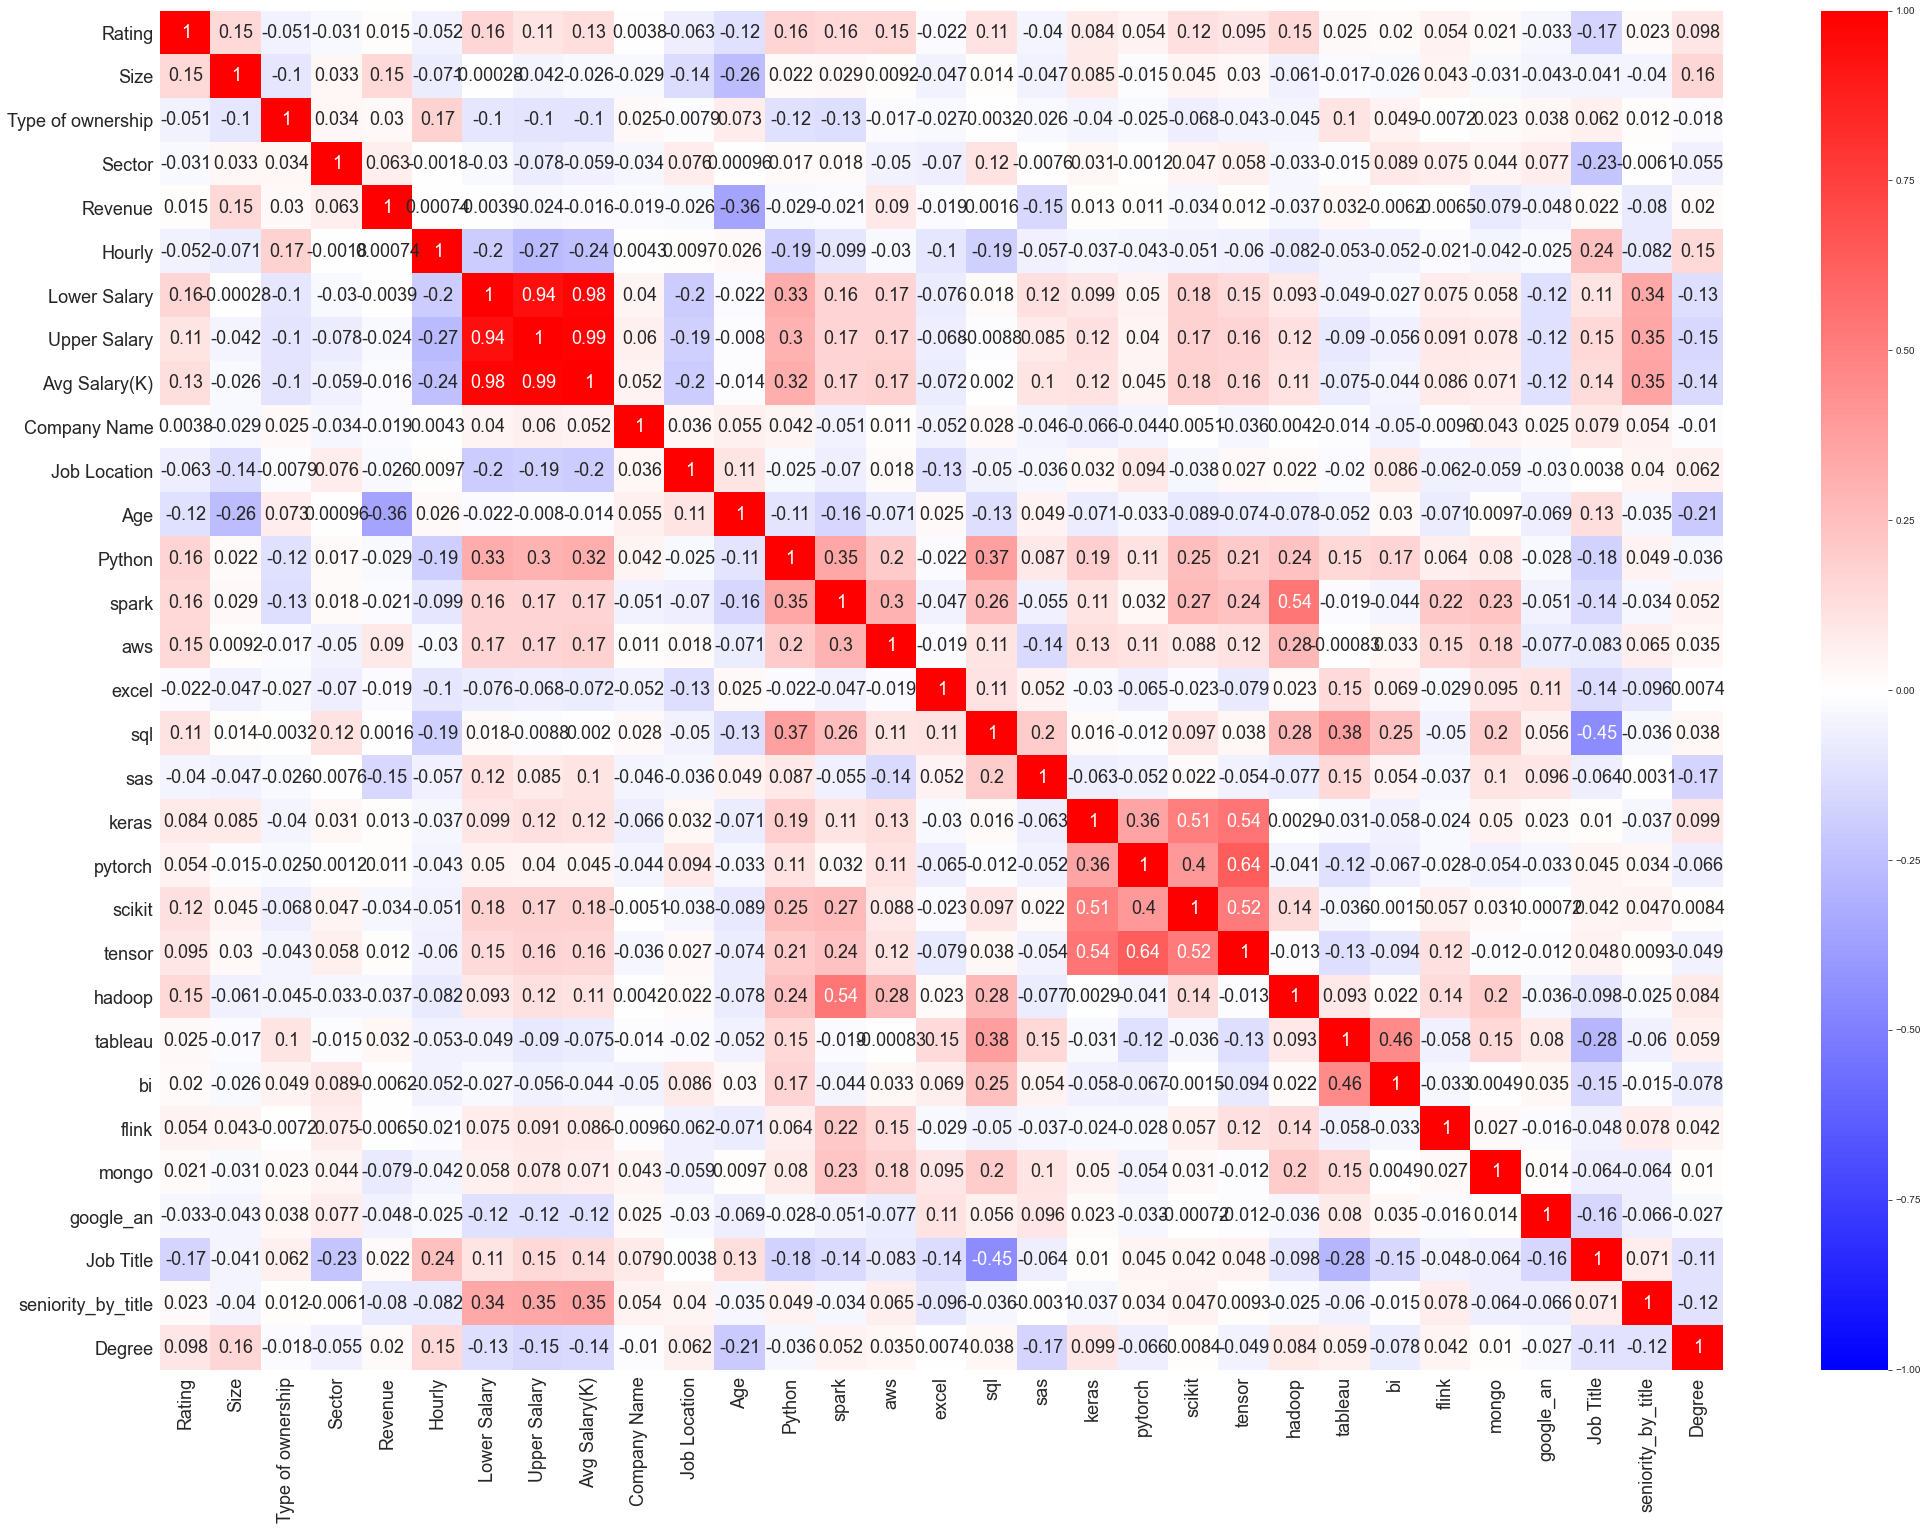

In [73]:

plt.figure(figsize = (35,25))
sns.heatmap(correlation,annot = True, vmax = 1.0, vmin = -1.0, cmap = 'bwr', annot_kws = {"size": 18})
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

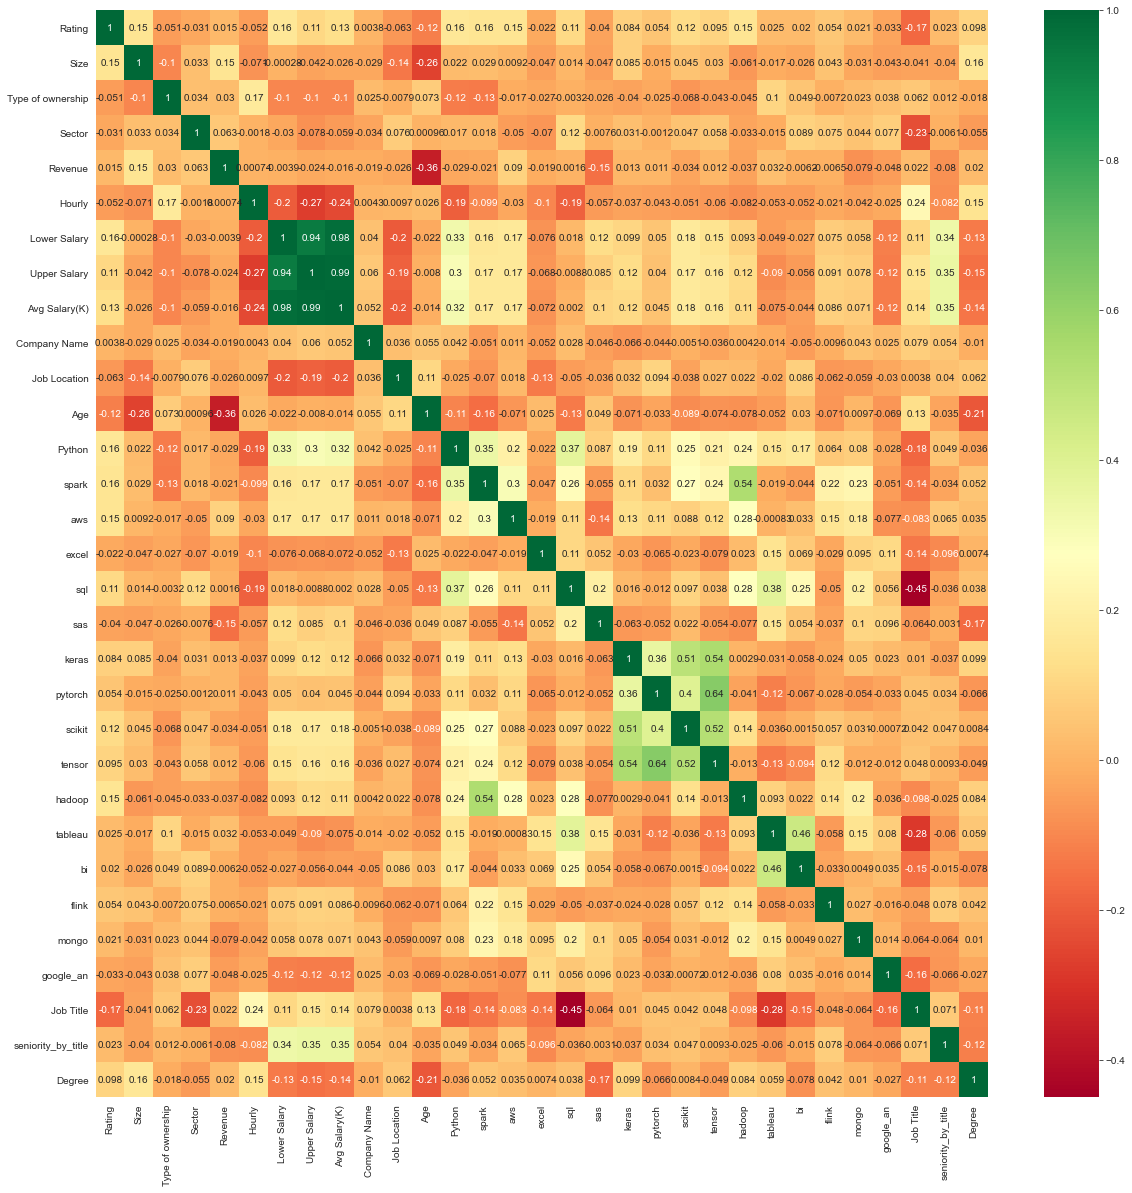

In [74]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [75]:
df.corr()['Avg Salary(K)']


Rating                0.131904
Size                 -0.025558
Type of ownership    -0.104405
Sector               -0.059082
Revenue              -0.016227
Hourly               -0.243771
Lower Salary          0.978679
Upper Salary          0.990032
Avg Salary(K)         1.000000
Company Name          0.052220
Job Location         -0.195838
Age                  -0.013981
Python                0.315552
spark                 0.170678
aws                   0.172660
excel                -0.072323
sql                   0.002008
sas                   0.101938
keras                 0.115658
pytorch               0.044759
scikit                0.178237
tensor                0.160098
hadoop                0.110562
tableau              -0.074753
bi                   -0.044491
flink                 0.085859
mongo                 0.070925
google_an            -0.123306
Job Title             0.135114
seniority_by_title    0.352036
Degree               -0.144341
Name: Avg Salary(K), dtype: float64

## Univariate Selection

In [76]:
df = df[['Rating',
 'Size',
 'Type of ownership',
 'Sector',
 'Revenue',
 'Hourly',
 'Lower Salary',
 'Upper Salary',
 'Company Name',
 'Job Location',
 'Age',
 'Python',
 'spark',
 'aws',
 'excel',
 'sql',
 'sas',
 'keras',
 'pytorch',
 'scikit',
 'tensor',
 'hadoop',
 'tableau',
 'bi',
 'flink',
 'mongo',
 'google_an',
 'Job Title',
 'seniority_by_title',
 'Degree',
 'Avg Salary(K)' ]]

In [77]:
cols = list(df.columns.values)

In [78]:
cols

['Rating',
 'Size',
 'Type of ownership',
 'Sector',
 'Revenue',
 'Hourly',
 'Lower Salary',
 'Upper Salary',
 'Company Name',
 'Job Location',
 'Age',
 'Python',
 'spark',
 'aws',
 'excel',
 'sql',
 'sas',
 'keras',
 'pytorch',
 'scikit',
 'tensor',
 'hadoop',
 'tableau',
 'bi',
 'flink',
 'mongo',
 'google_an',
 'Job Title',
 'seniority_by_title',
 'Degree',
 'Avg Salary(K)']

In [79]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
data = df
X = data.iloc[:,0:30]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range


In [80]:
y=y.astype('int')

In [81]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=20)
fit = bestfeatures.fit(X,y)


In [82]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [83]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [84]:
featureScores

Specs         Score
0               Rating     13.123326
1                 Size      0.471964
2    Type of ownership      8.117454
3               Sector      2.542889
4              Revenue      0.190619
5               Hourly     46.825272
6         Lower Salary  16868.815623
7         Upper Salary  36218.954371
8         Company Name      1.989937
9         Job Location     29.412327
10                 Age      0.148102
11              Python     81.916684
12               spark     22.225961
13                 aws     22.802957
14               excel      3.911340
15                 sql      0.003115
16                 sas      7.701745
17               keras     10.009599
18             pytorch      1.503230
19              scikit     24.298728
20              tensor     19.473090
21              hadoop      9.216047
22             tableau      4.156100
23                  bi      1.453862
24               flink      5.514702
25               mongo      3.715539
26           google_an     11.549462
27           Job Title     13.691175
28  seniority_by_title    104.606162
29              Degree     15.732049

In [85]:
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                 Specs         Score
7         Upper Salary  36218.954371
6         Lower Salary  16868.815623
28  seniority_by_title    104.606162
11              Python     81.916684
5               Hourly     46.825272
9         Job Location     29.412327
19              scikit     24.298728
13                 aws     22.802957
12               spark     22.225961
20              tensor     19.473090
29              Degree     15.732049
27           Job Title     13.691175
0               Rating     13.123326
26           google_an     11.549462
17               keras     10.009599
21              hadoop      9.216047
2    Type of ownership      8.117454
16                 sas      7.701745
24               flink      5.514702
22             tableau      4.156100


# Splitting data into train and test

In [86]:
imp_var = ['Job Location','Job Title','Type of ownership','Degree','Rating','Hourly','Python','spark', 'aws', 'sas', 'keras', 'scikit',
       'tensor', 'hadoop', 'flink', 'google_an','seniority_by_title','tableau']

In [87]:
X=df[imp_var]
y=df['Avg Salary(K)']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.3, random_state= 44)


In [89]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(519, 18) (223, 18) (519,) (223,)


# Multiple Linear regression using sklearn

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
# Create a Linear regressor
model = LinearRegression()

# Train the model using the training sets 
model.fit(X_train, y_train)

LinearRegression()

In [92]:
# Model prediction on train data

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = model.predict(X_train)

print("Mean squared error :",mean_squared_error(y_train,y_pred))

print("Root Mean squared error :",np.sqrt(mean_squared_error(y_train,y_pred)))

lr_tr=print(" R Squared:", r2_score(y_train,y_pred))

Mean squared error : 818.9501790515341
Root Mean squared error : 28.617305586856602
 R Squared: 0.3775808838376564


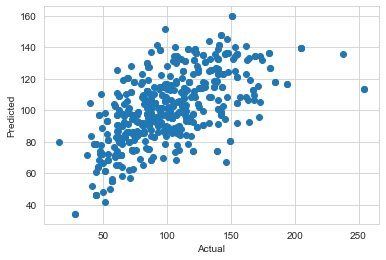

In [93]:
# Visualizing the differences between actual  and predicted values

plt.scatter(y_train,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


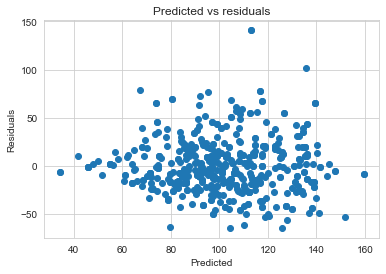

In [94]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

C:\Users\pritam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


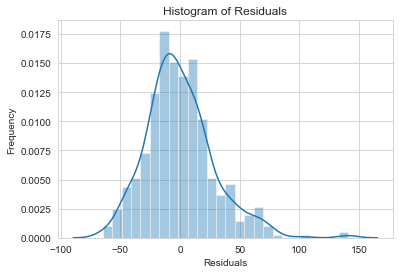

In [95]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [96]:
# Predicting Test data with the model
y_test_pred = model.predict(X_test)

print("Mean squared error :",mean_squared_error(y_test, y_test_pred))

print("Root Mean squared error :",np.sqrt(mean_squared_error(y_test, y_test_pred)))

lr_te=print(" R Squared:", r2_score(y_test, y_test_pred))

Mean squared error : 1068.4477579350062
Root Mean squared error : 32.68711914401461
 R Squared: 0.3343831483993238


### Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.

# Decision tree regression


In [97]:
# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor


# Create a Decision Tree Regressor
reg = DecisionTreeRegressor()


In [98]:
# Train the model using the training sets 
reg = reg.fit(X_train,y_train)


# Model prediction on train data
y_pred = reg.predict(X_train)

from sklearn import metrics
print("Mean squared error :",mean_squared_error(y_train,y_pred))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_train,y_pred)))
print(" R Squared:", r2_score(y_train, y_pred))

Mean squared error : 10.402071290944122
Root mean squared error: 3.225224223359381
 R Squared: 0.9920942101427153


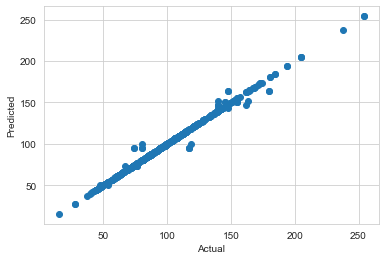

In [99]:
# Visualizing the differences between actual prices and predicted values

plt.scatter(y_train,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


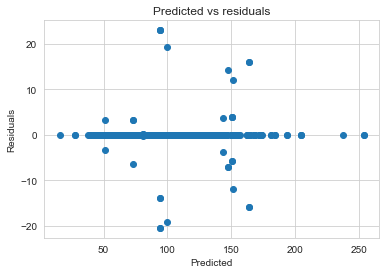

In [100]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [101]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [102]:
print("Mean squared error :",mean_squared_error(y_test, y_test_pred))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
print(" R Squared:", r2_score(y_test,y_test_pred))

Mean squared error : 956.9302441454907
Root mean squared error: 30.93428913270015
 R Squared: 0.40385583517848167


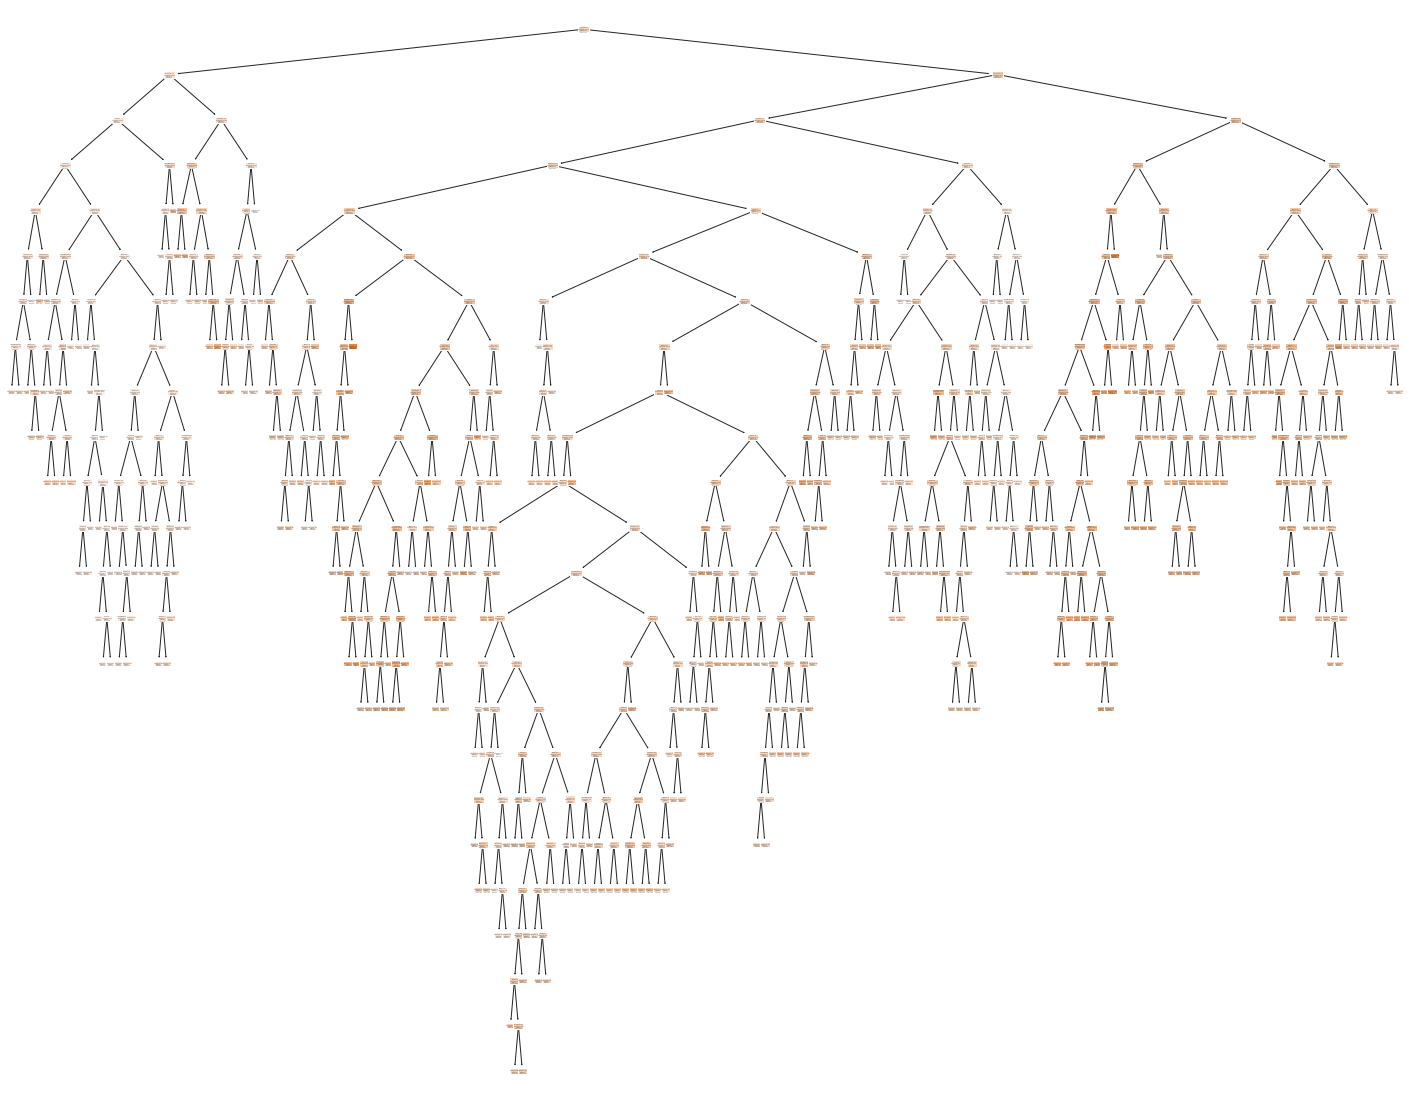

In [103]:

from sklearn import tree
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, 
                   feature_names=imp_var,  
                   class_names="Avg Salary(K)",
                   filled=True)

# Optimizing the Decision Tree Regression: Pruning

In [106]:
# Create Decision Tree classifer object
reg = DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

# dt regressor
reg = reg.fit(X_train,y_train)

#Predict the response for train data
y_pred = reg.predict(X_train)
print("Mean Squared Error :", mean_squared_error(y_train,y_pred))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_train,y_pred)))
dt_tr=print("R Squared:", r2_score(y_train, y_pred))

Mean Squared Error : 803.3368594817919
Root mean squared error: 28.343197763869057
R Squared: 0.3894473304366596


In [107]:
#Predict the response for test data

y_test_pred = reg.predict(X_test)
print("Mean Squared Error :", mean_squared_error(y_test,y_test_pred))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
dt_te=print(" R Squared:", r2_score(y_test, y_test_pred))

Mean Squared Error : 1057.8338320356415
Root mean squared error: 32.52435751918309
 R Squared: 0.34099536494223837


# Random Forest Regression

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
rf = RandomForestRegressor(random_state=42,criterion='friedman_mse', n_jobs=-1, max_depth=5,
                                       n_estimators=200,min_samples_leaf=50, oob_score=True)

In [113]:
%%time
rf.fit(X_train, y_train)

Wall time: 582 ms


RandomForestRegressor(criterion='friedman_mse', max_depth=5,
                      min_samples_leaf=50, n_estimators=200, n_jobs=-1,
                      oob_score=True, random_state=42)

In [114]:
y_train=y_train.astype('int')

In [115]:
# checking the oob score
rf.oob_score_

0.333978263212906

# Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

In [116]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [117]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10,25,30,50,100]
}

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring= 'r2')

In [120]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 125 candidates, totalling 500 fits
Wall time: 28 s


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 30, 50, 100]},
             scoring='r2', verbose=1)

In [121]:
grid_search.best_score_

0.44370480422422653

In [122]:
rf_best = grid_search.best_estimator_ # which hyperparameter is best
rf_best

RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                      random_state=42)

[Text(0.38046875, 0.96875, 'Job Title <= 2.5\nsquared_error = 1384.903\nsamples = 328\nvalue = 100.701'),
 Text(0.1625, 0.90625, 'seniority_by_title <= 1.5\nsquared_error = 408.005\nsamples = 56\nvalue = 66.434'),
 Text(0.1, 0.84375, 'Job Location <= 3.0\nsquared_error = 326.769\nsamples = 45\nvalue = 62.603'),
 Text(0.05, 0.78125, 'Rating <= 3.65\nsquared_error = 442.728\nsamples = 11\nvalue = 76.778'),
 Text(0.025, 0.71875, 'squared_error = 521.234\nsamples = 5\nvalue = 83.375'),
 Text(0.075, 0.71875, 'squared_error = 317.25\nsamples = 6\nvalue = 71.5'),
 Text(0.15, 0.78125, 'Job Title <= 0.5\nsquared_error = 186.65\nsamples = 34\nvalue = 57.5'),
 Text(0.125, 0.71875, 'squared_error = 564.245\nsamples = 5\nvalue = 71.429'),
 Text(0.175, 0.71875, 'Type of ownership <= 3.5\nsquared_error = 88.458\nsamples = 29\nvalue = 55.233'),
 Text(0.15, 0.65625, 'Rating <= 3.95\nsquared_error = 74.108\nsamples = 23\nvalue = 57.781'),
 Text(0.125, 0.59375, 'Rating <= 3.6\nsquared_error = 48.98\nsamp

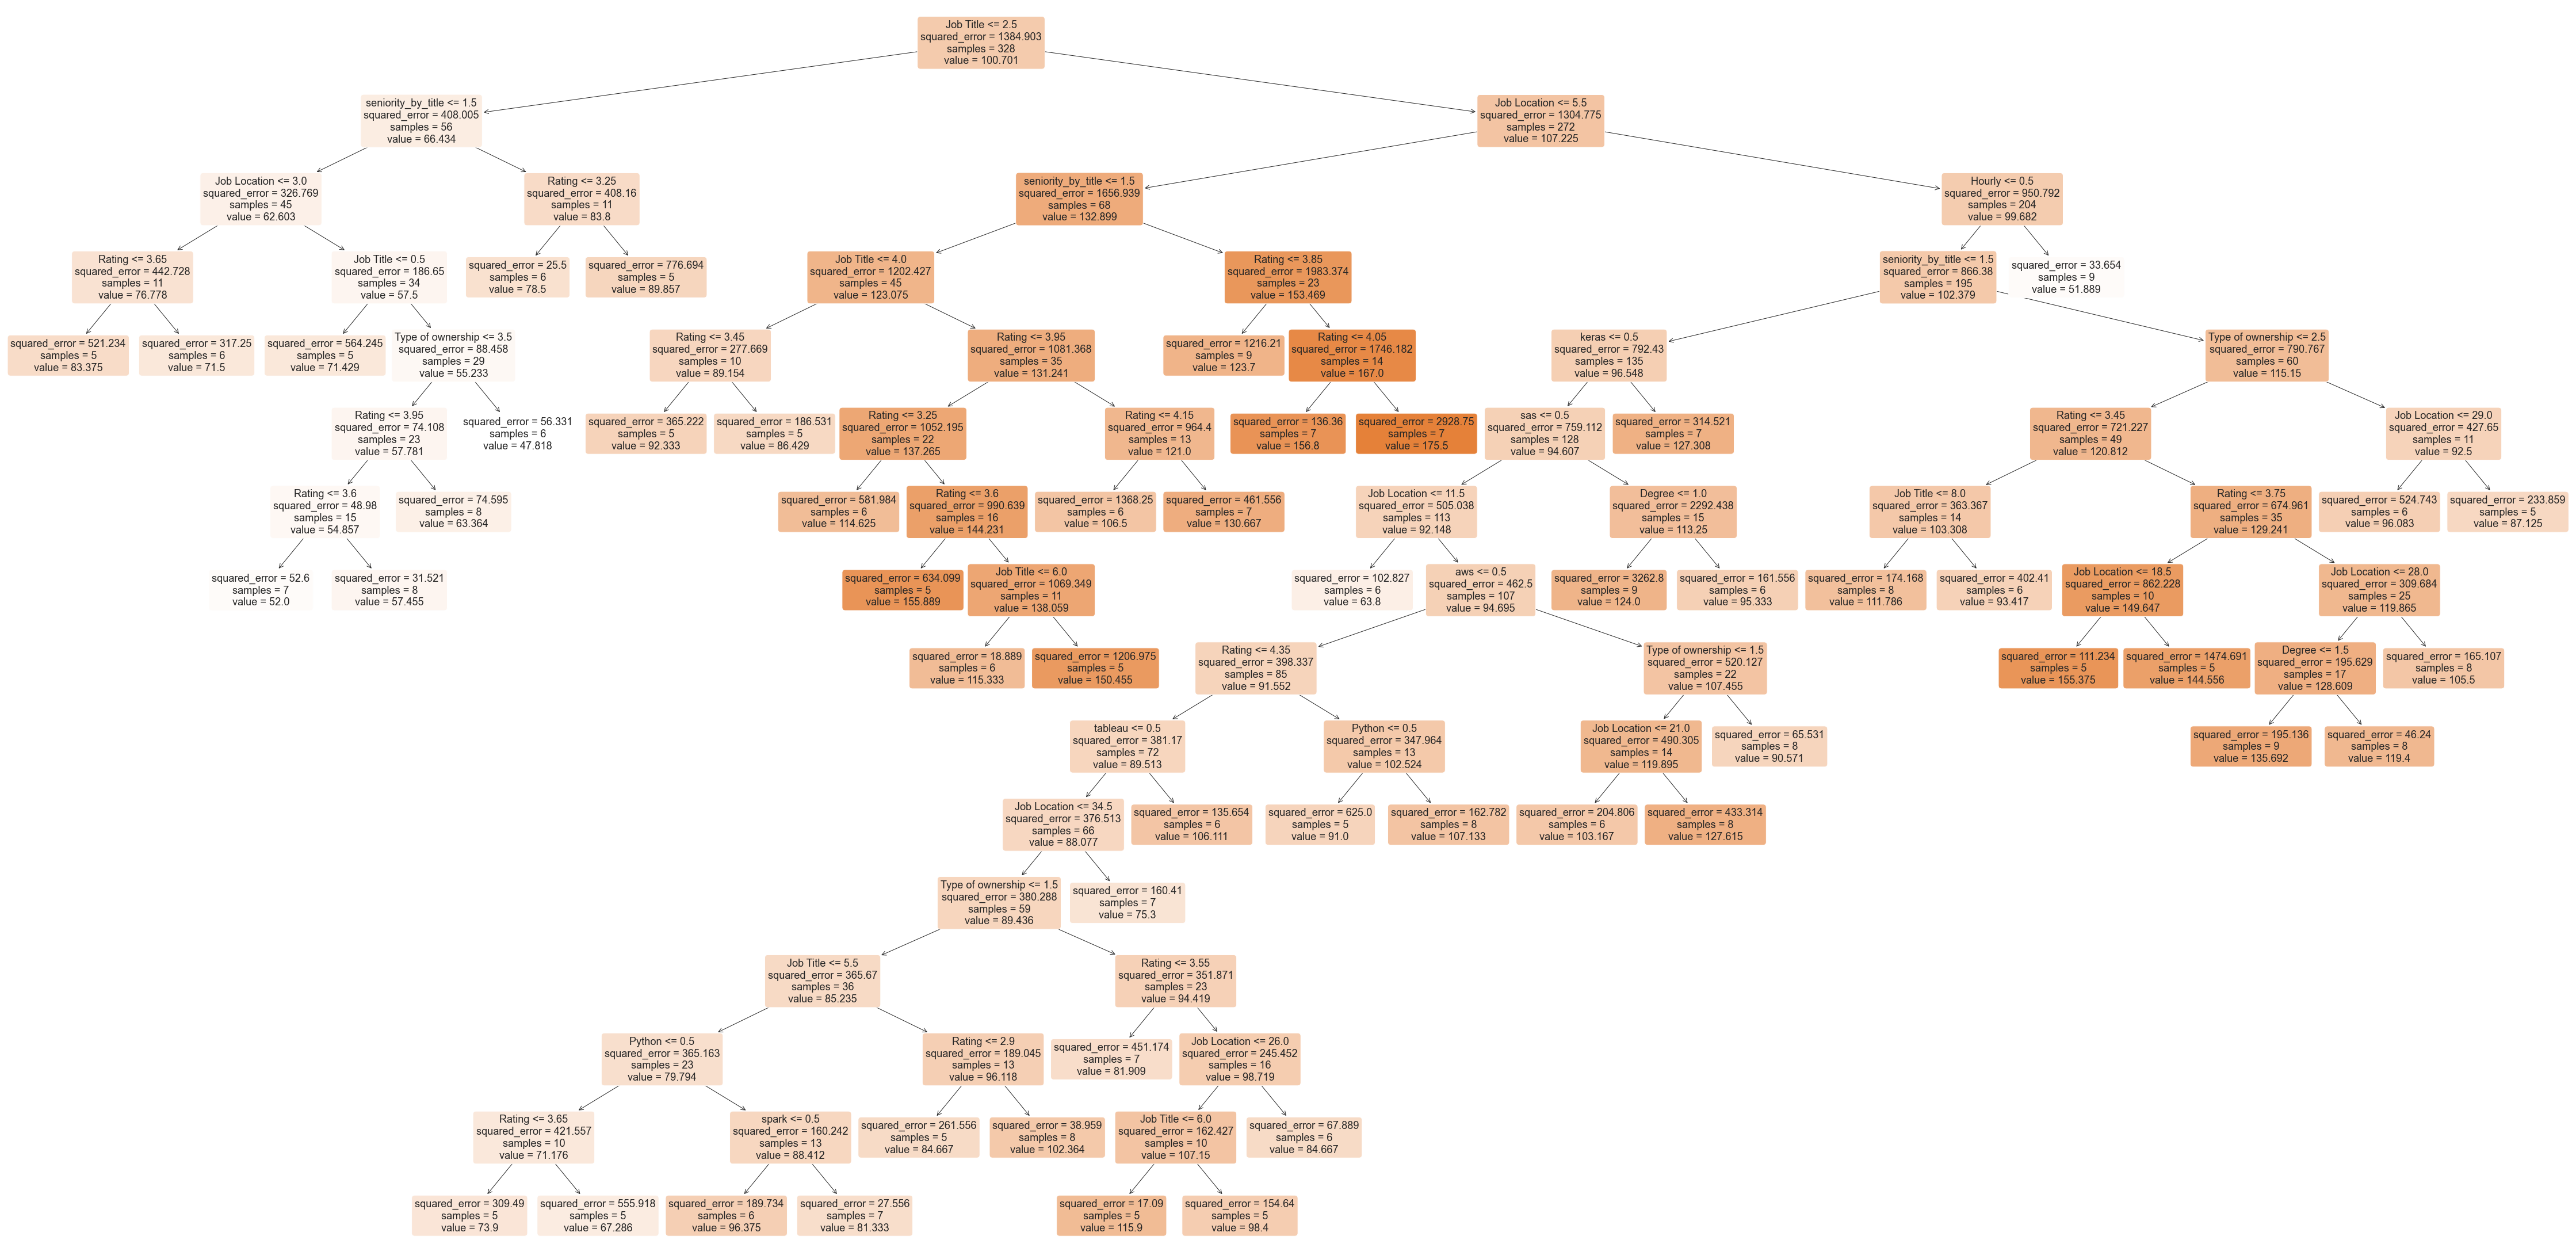

In [123]:
# visualizing the tree

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[1], feature_names = imp_var,filled=True,rounded=True)

# sort the data with the help of feature importance

In [124]:
rf_best.feature_importances_

array([1.72917525e-01, 3.40049318e-01, 3.95231702e-02, 3.14858351e-02,
       1.38480893e-01, 3.00536653e-02, 2.51394428e-02, 8.87684675e-03,
       1.30976635e-02, 6.52286387e-03, 5.91051808e-03, 4.86716241e-03,
       6.90637460e-03, 4.06424288e-03, 0.00000000e+00, 2.31365849e-05,
       1.62926231e-01, 9.15511094e-03])

In [125]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [126]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
1            Job Title  0.340049
0         Job Location  0.172918
16  seniority_by_title  0.162926
4               Rating  0.138481
2    Type of ownership  0.039523
3               Degree  0.031486
5               Hourly  0.030054
6               Python  0.025139
8                  aws  0.013098
17             tableau  0.009155
7                spark  0.008877
12              tensor  0.006906
9                  sas  0.006523
10               keras  0.005911
11              scikit  0.004867
13              hadoop  0.004064
15           google_an  0.000023
14               flink  0.000000

In [127]:
rf = grid_search

In [128]:
predicted=rf.predict(X_test)
predicted

array([107.12494339,  99.02579367,  85.94783011,  89.74986288,
        94.81282265, 122.53203358, 115.60243037,  70.98279318,
       134.94250537,  69.16693477,  60.74975805, 117.59114291,
       109.78184111,  85.94783011,  99.39922523, 133.65469827,
       144.38160354,  96.76088902,  94.46238149, 108.62350162,
        93.78071002,  74.92921731,  95.9861681 ,  94.24635607,
        87.9743056 ,  71.19997897,  92.1810255 ,  93.60722051,
       113.40038323,  53.3514873 , 100.3661767 , 132.12808729,
       101.76047107,  52.03172236, 130.82920902, 100.01126122,
        76.02442955,  63.91194977,  71.40910601,  99.45635751,
       128.47138817,  61.85625532,  69.20190469, 129.82027914,
        99.21615985,  54.42821576, 100.5582327 ,  95.19911368,
        93.91267259,  74.15897368, 104.06711243, 130.96595031,
       106.82486694, 103.48854607, 140.02757206,  88.93515666,
        70.4346583 ,  88.9438669 ,  92.30967695, 128.55369724,
       128.36385617, 107.52330199, 107.59178348, 110.55

In [129]:
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test,predicted)))
rf_tr=print(" R Squared:", r2_score(y_test, predicted))

Root mean squared error: 26.988435291908182
 R Squared: 0.5462397704055253


In [130]:
predicted=rf.predict(X_train)
predicted

array([135.78853837,  91.41850271,  82.08344147,  87.9743056 ,
       108.03676091,  79.716061  , 141.20750308, 112.45911407,
        62.69976601, 134.70844607, 159.58596389, 127.18110043,
        77.85425403,  61.89259165, 132.07808154, 119.19576724,
        99.55511554, 137.20543   ,  81.44468596, 142.8414154 ,
        94.8697128 , 109.2515642 , 145.42294402, 141.6506659 ,
        67.26202897,  60.0440566 , 128.55369724, 109.30466001,
        64.2771829 , 111.93307344,  94.20707684, 102.40280992,
       105.98283468,  92.30967695,  82.08468283, 153.72389098,
       133.65469827, 100.53970213, 168.84621035, 116.14996232,
        58.7249416 ,  92.1810255 ,  96.76088902,  78.40047036,
       153.58675763, 116.14996232, 112.77213665, 109.23635164,
       101.56735883, 106.57775297,  95.30727333,  90.58331481,
       100.3101358 ,  93.60722051,  93.67030817, 127.90857091,
        89.95171773, 135.5138509 ,  94.82422385,  71.19997897,
        50.68855774, 137.40309004, 124.94044507, 168.84

In [131]:
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_train,predicted)))
rf_te=print(" R Squared:", r2_score(y_train, predicted))

Root mean squared error: 20.010079861869304
 R Squared: 0.6961497521835766


# SVM

In [132]:
# Import SVM Regressor

from sklearn.svm import SVR

In [133]:
# Create a SVM Regressor
svr_rbf=SVR()

In [134]:
# Train the model using the training sets
svr_rbf.fit(X_train,y_train)

SVR()

In [135]:
# Model prediction on train data
y_pred=svr_rbf.predict(X_train)
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_train,y_pred)))
sv_tr=print(" R Squared:", r2_score(y_train, y_pred))

Root mean squared error: 35.11284311897348
 R Squared: 0.0643919642546108


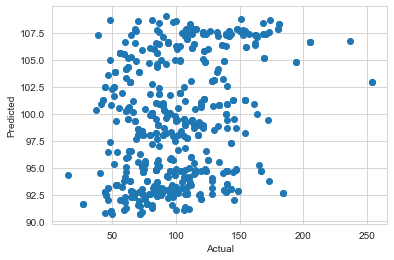

In [136]:
# Visualizing the differences between actual prices and predicted values

plt.scatter(y_train,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

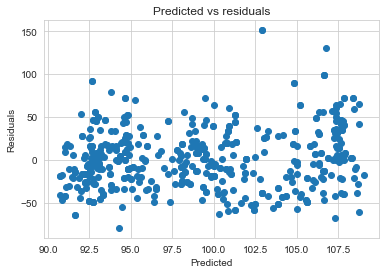

In [137]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [138]:
# Model prediction on test data

y_test_pred=svr_rbf.predict(X_test)
print(" R Squared:", r2_score(y_test, y_test_pred))
sv_te=print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

 R Squared: 0.0307007053439613
Root mean squared error: 39.445134395000515


## Knn

In [139]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics 

#Train Model and Predict
k = 4

model = KNeighborsRegressor(n_neighbors = k)



neigh=model.fit(X_train,y_train)


In [140]:
y_pred = neigh.predict(X_train)

print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_train,y_pred)))
k_tr=print(" R Squared:", r2_score(y_train, y_pred))

Root mean squared error: 21.82716418454568
 R Squared: 0.6384598103801251


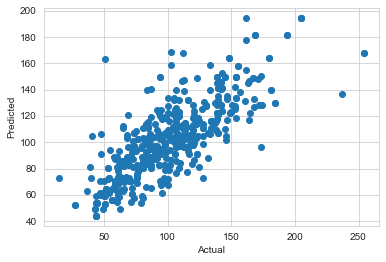

In [141]:
# Visualizing the differences between actual prices and predicted values

plt.scatter(y_train,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

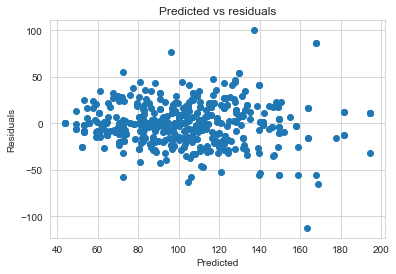

In [142]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [143]:
y_pred = neigh.predict(X_test)

print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
k_te=print(" R Squared:", r2_score(y_test, y_pred))

Root mean squared error: 30.815854234424677
 R Squared: 0.40841188724053235


## plotting the error against number of k

Minimum error:- 0.7219730941704036 at K = 0


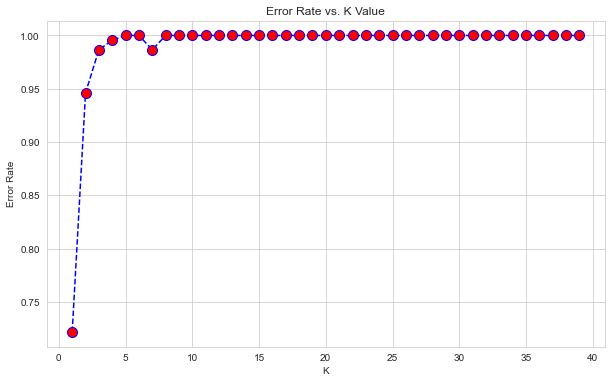

In [144]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

### Plotting the accuracy against number of k

Maximum score:- 0.43866439807799473 at K = 4


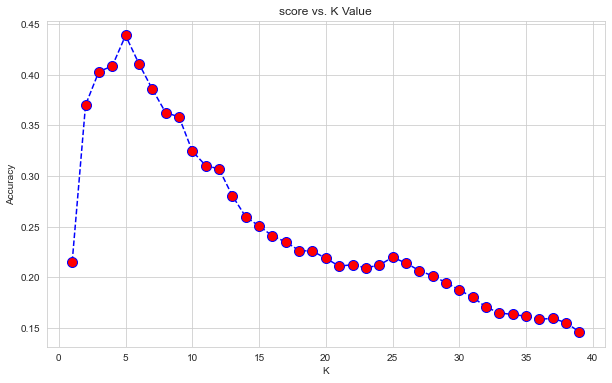

In [145]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsRegressor(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.r2_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('score vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum score:-",max(acc),"at K =",acc.index(max(acc)))


In [ ]:
We are getting very less accuarcy because this data was for visualization purpose. 
Random forest was better than other algoritms.